In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from graphviz import Digraph
from IPython.display import Image, display

In [52]:
df=pd.read_csv("decision-tree.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [53]:
df = shuffle(df)
data=np.array(df,dtype=float)

In [54]:
np.random.shuffle(data)
training, test = data[:round(len(data)*0.8),:], data[round(len(data)*0.8):,:]

In [55]:
def check_purity(data):
    classes = np.unique(data[:,-1])
    if len(classes) == 1:
        return True
    else:
        return False
def majority_class(data):
    classes,count = np.unique(data[:,-1],return_counts = True)
    index = np.argmax(count)
    return classes[index]
def splitting_points(data):
    data = data[:,0:-1]
    points={}
    rows,columns = data.shape
    #print(columns)
    for col in range(columns):
        points[col]=[]
        value = data[:,col]
        unique_points = np.unique(value)
        for i in range(1,len(unique_points),1):
            middle_point = (unique_points[i]+unique_points[i-1])/2
            points[col].append(middle_point)
    return points
def seperate_data(data,c_index,point):
    c_value = data[:,c_index]
    
    left = data[c_value <= point]
    right = data[c_value > point]
    return left,right
    
    

In [56]:
class Node:
    def __init__(self, c_index=None, c_value=None, data_left=None, data_right=None, gain=None, name=None,leaf=None,group=None):
        self.c_index = c_index
        self.c_value = c_value
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.name = name
        self.is_leaf= leaf
        self.group = group

<h1> Entropy calculation <h1>

In [57]:
def find_entropy(data):
    classes,count = np.unique(data[:,-1],return_counts = True)
    probability = count / count.sum()
    probability = probability * np.log2(probability)
    entropy = np.sum(probability) * -1
    return entropy


def split_entropy(left_data,right_data):
    total_data = len(left_data)+len(right_data)
    total_entropy = (len(left_data)/total_data) * find_entropy(left_data)
    total_entropy +=(len(right_data)/total_data) * find_entropy(right_data) 
    return total_entropy

def find_spliting_point(data,split_point):
    min_entropy = 99999
    s_index=-1
    s_value=-1
    for c_index in split_point:
        for value in split_point[c_index]:
            left,right = seperate_data(data,c_index,value)
            cur_entropy = split_entropy(left,right)
            if cur_entropy <=min_entropy:
                min_entropy = cur_entropy
                s_index = c_index
                s_value = value
    return s_index,s_value
                
    
    
    

<h1> creating tree <h1>

In [58]:
def create_tree(data,root,possible_splitting_point):
    if check_purity(data) or len(data) <= 10 or len(possible_splitting_point) == 0:
        root.is_leaf = True
        root.group = majority_class(data)
        return root
    else:
        s_index,s_value = find_spliting_point(data,possible_splitting_point)
        data_left,data_right =  seperate_data(data,s_index,s_value)
        del possible_splitting_point[s_index]
        root.c_index = s_index
        root.c_value = s_value
        root.name = df.columns[s_index]
        root.is_leaf = False
        left_node = Node()
        right_node = Node()
        left_node = create_tree(data_left,left_node,possible_splitting_point)
        right_node = create_tree(data_right,right_node,possible_splitting_point)
        root.data_left = left_node
        root.data_right = right_node
        return root
        
        
    

In [59]:
split_points = splitting_points(training)
Root = Node()
Root = create_tree(training,Root,split_points)

In [60]:
print(Root.c_index)
print(Root.c_value)

1
123.5


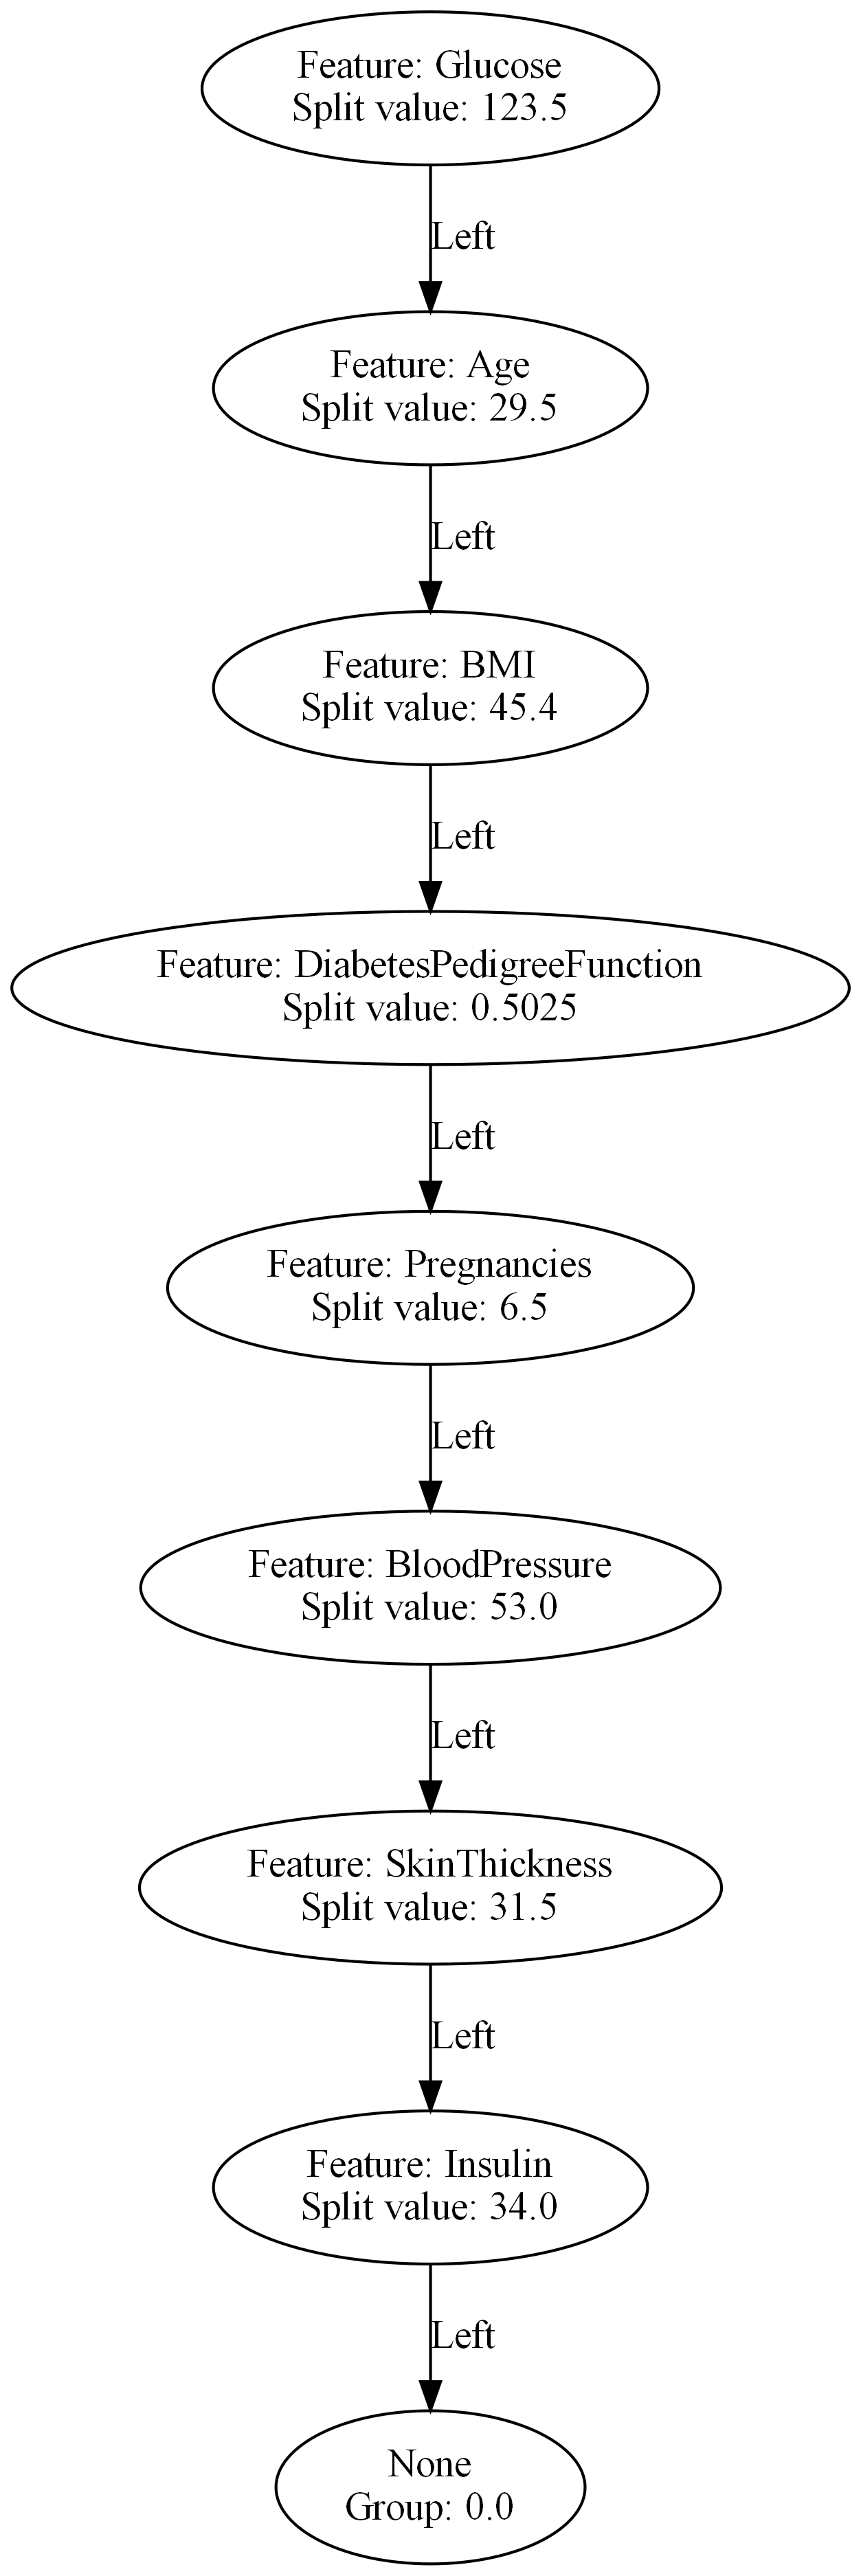

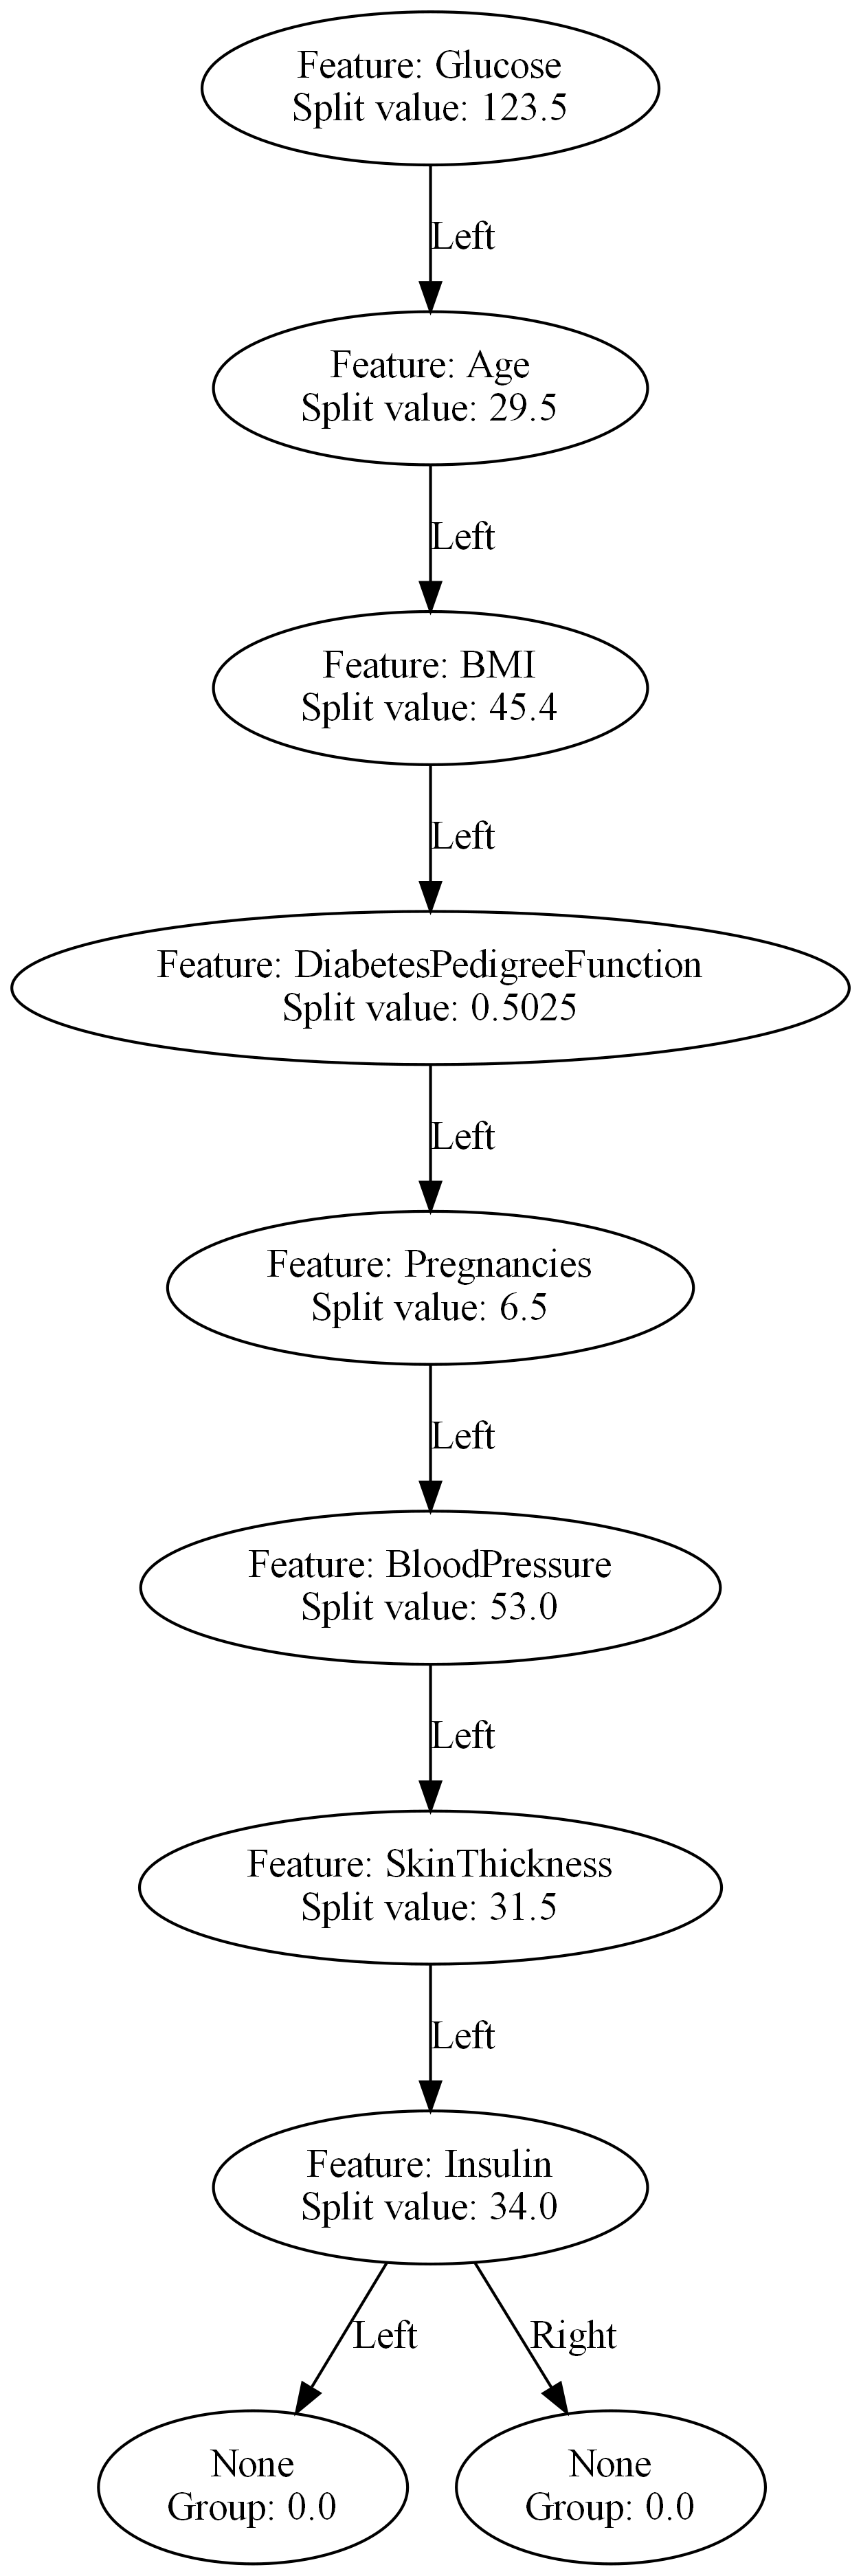

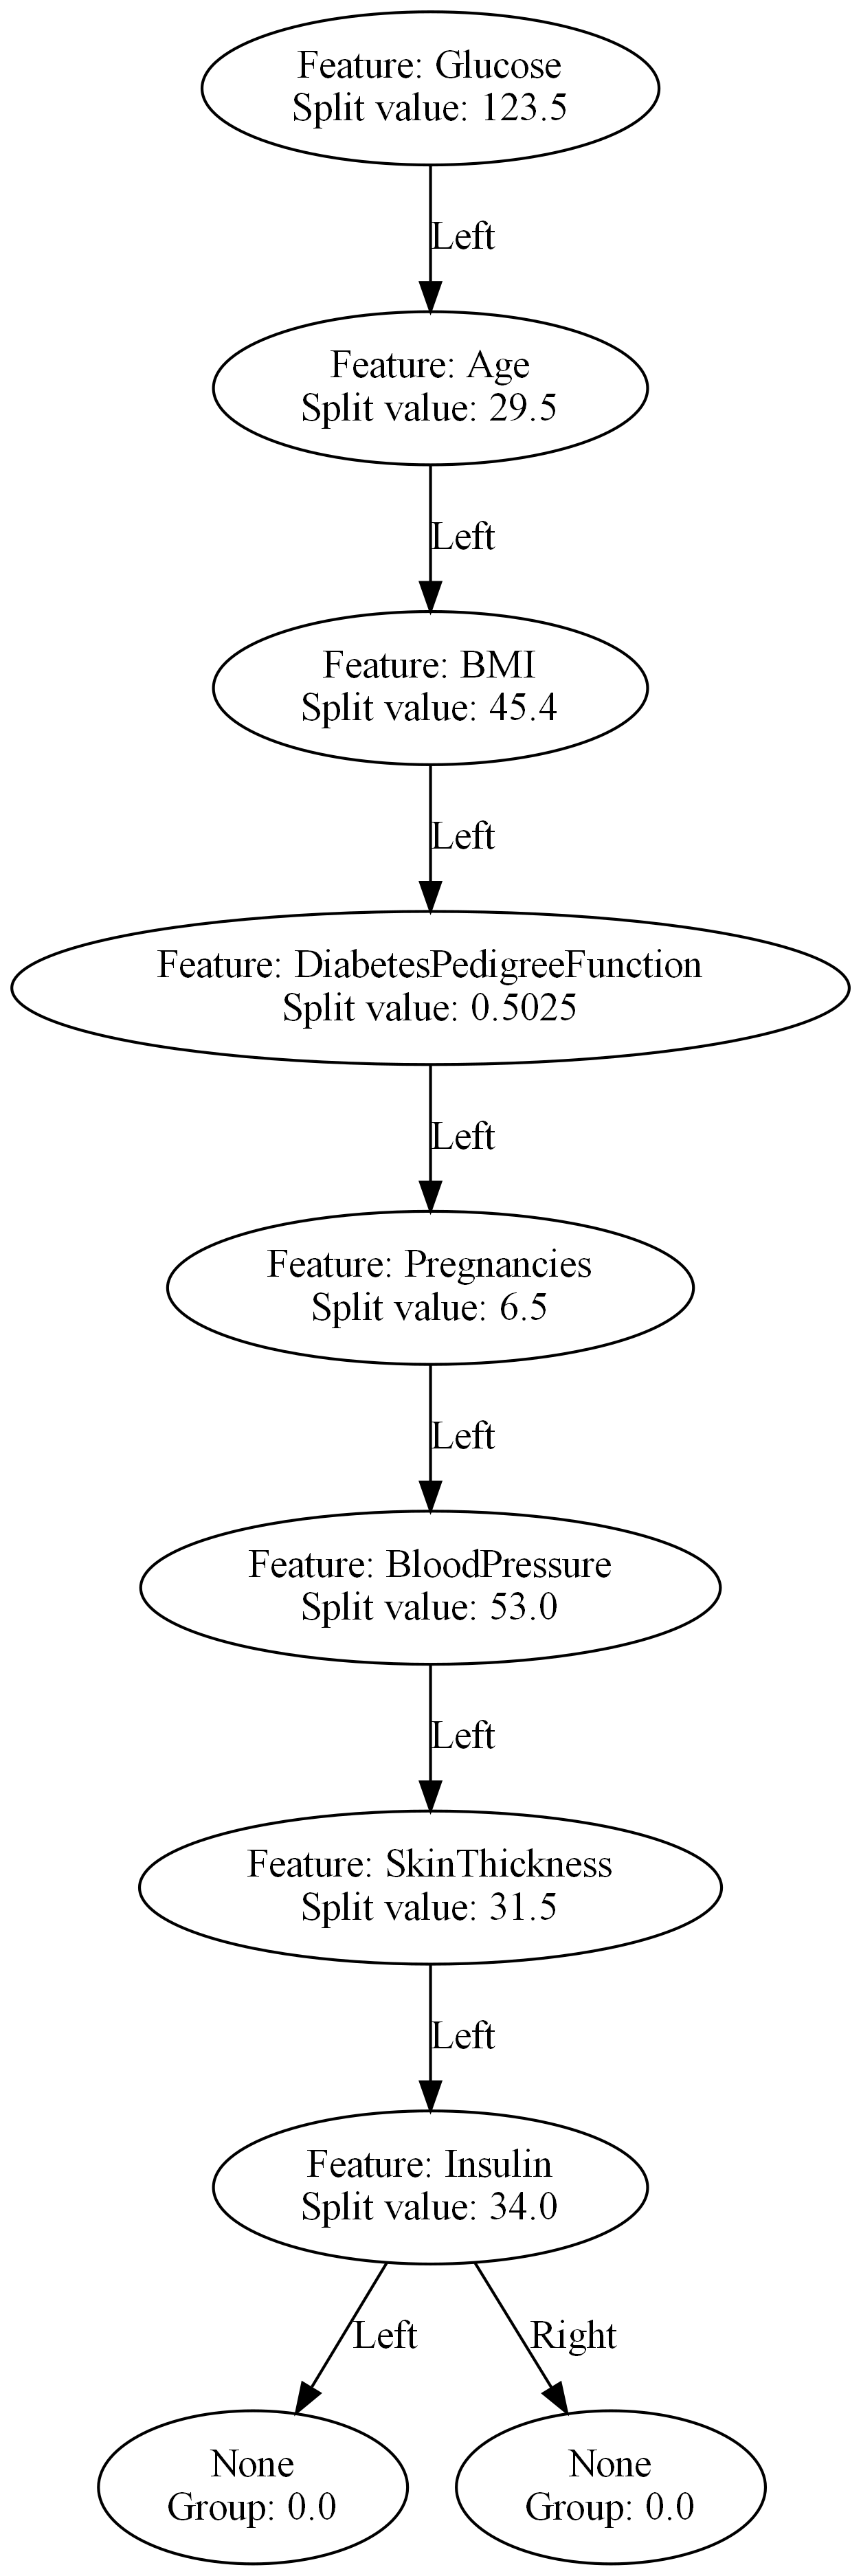

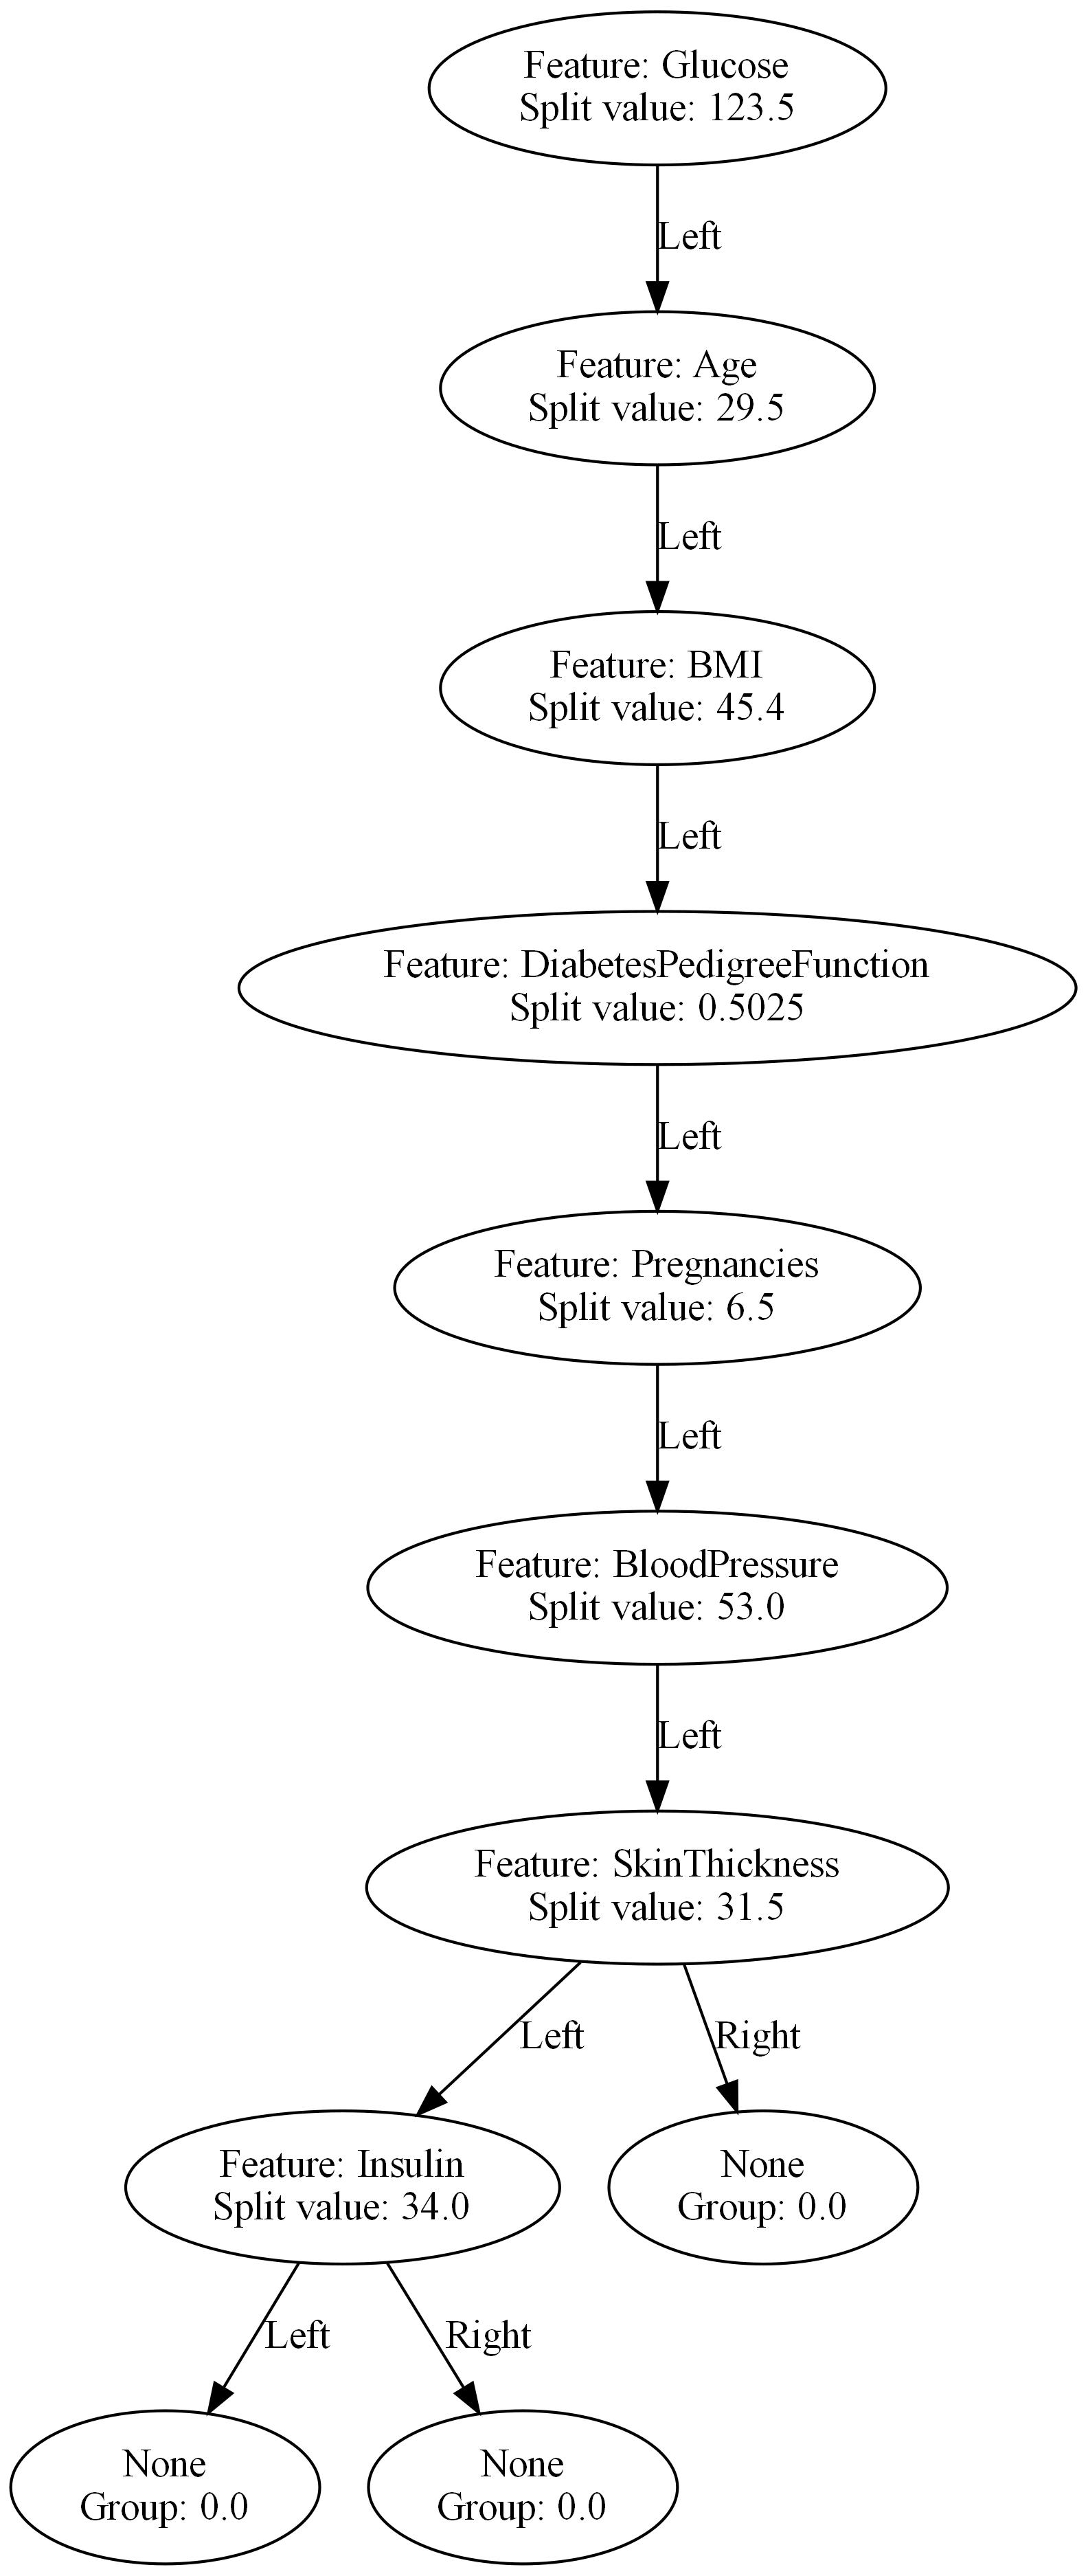

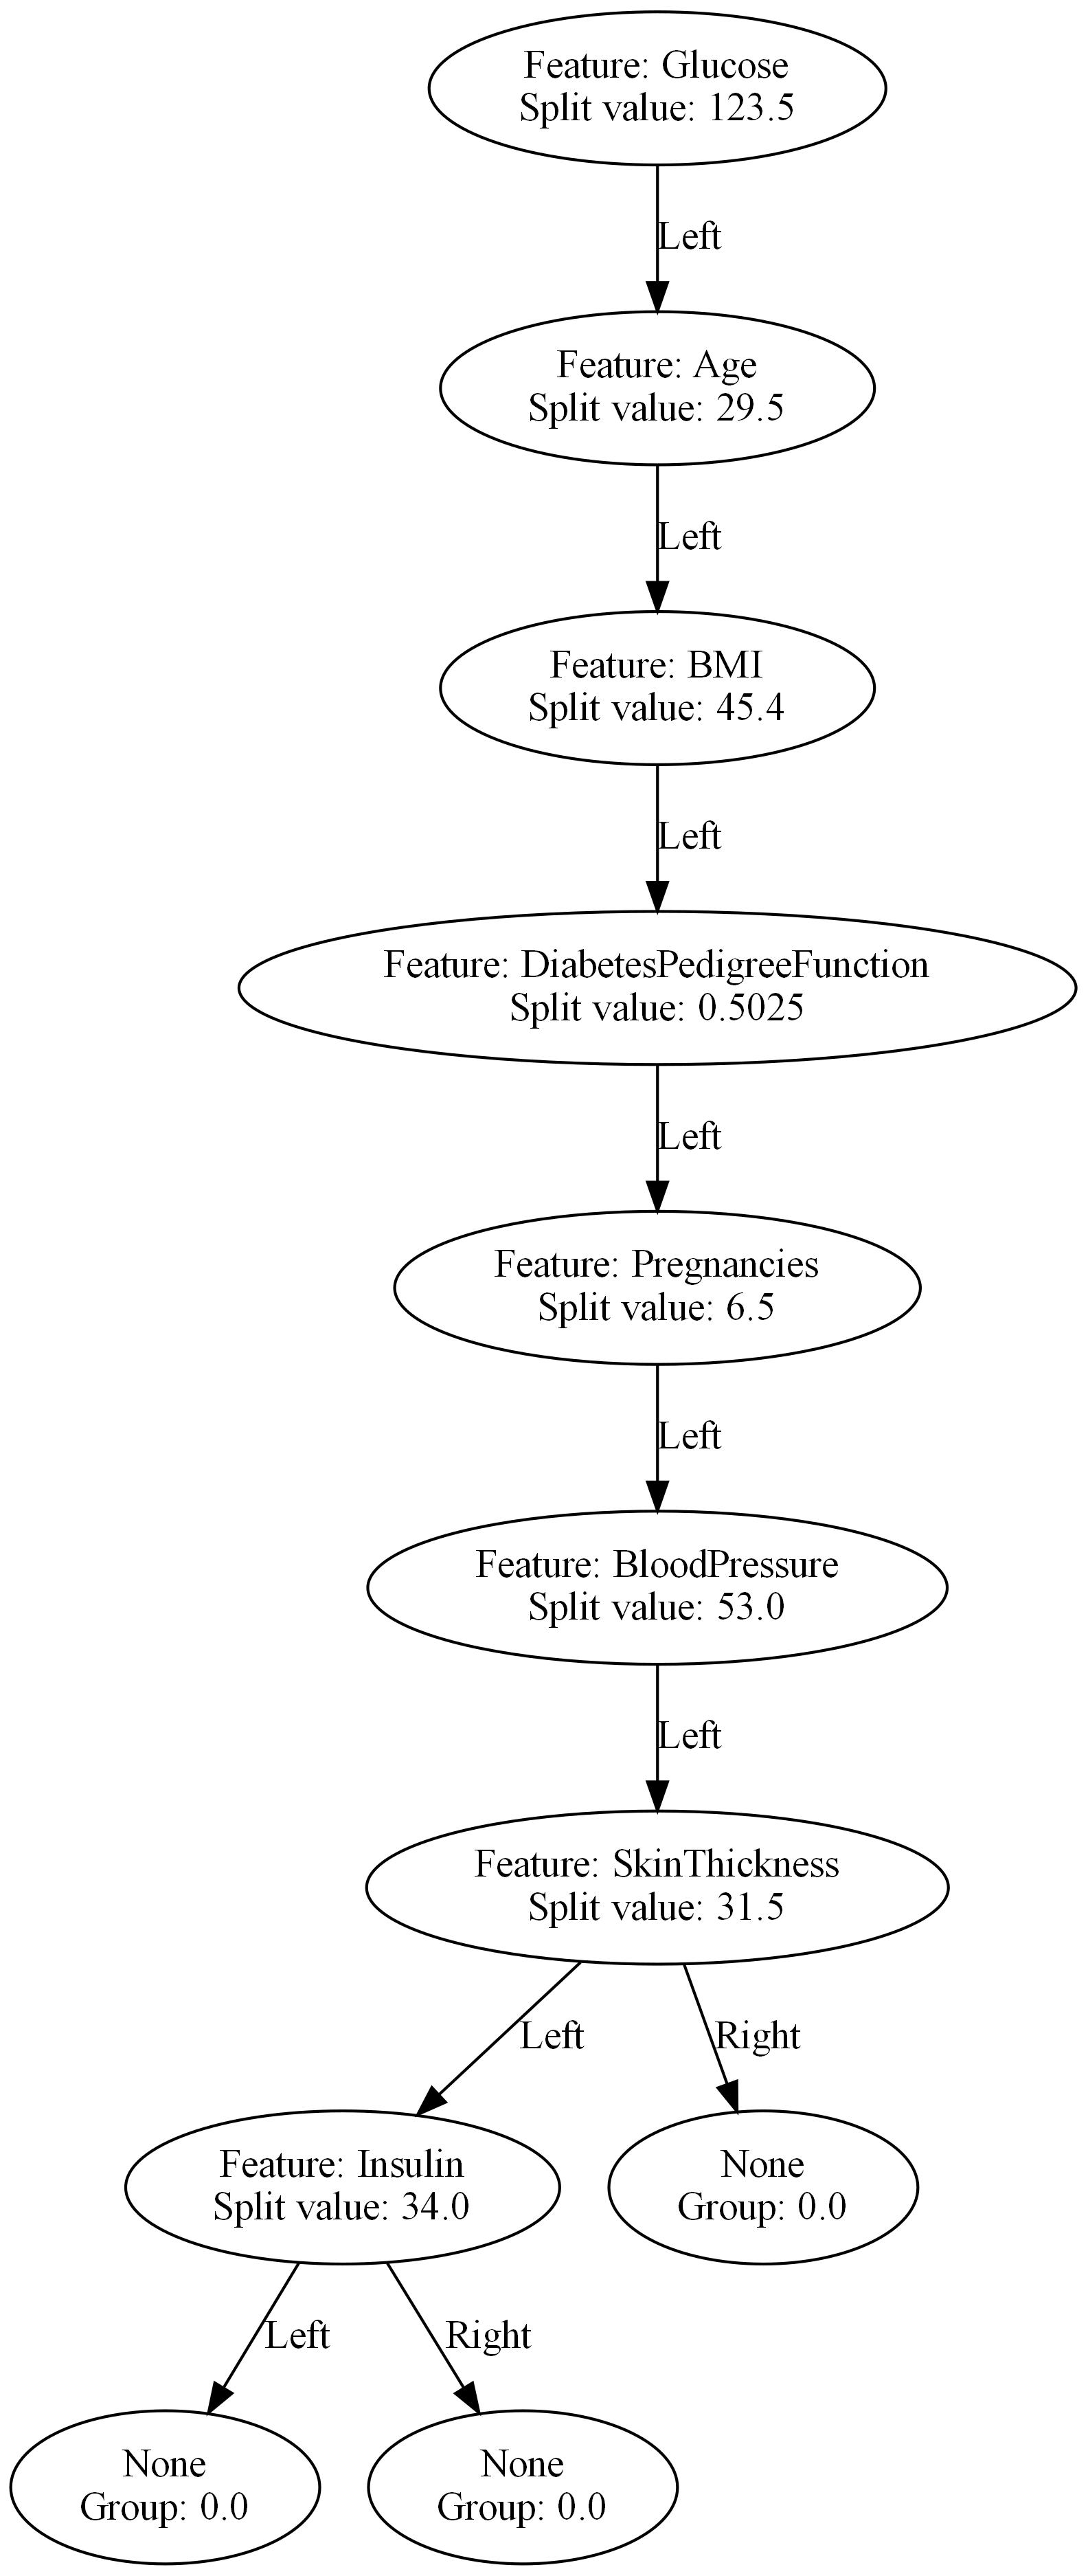

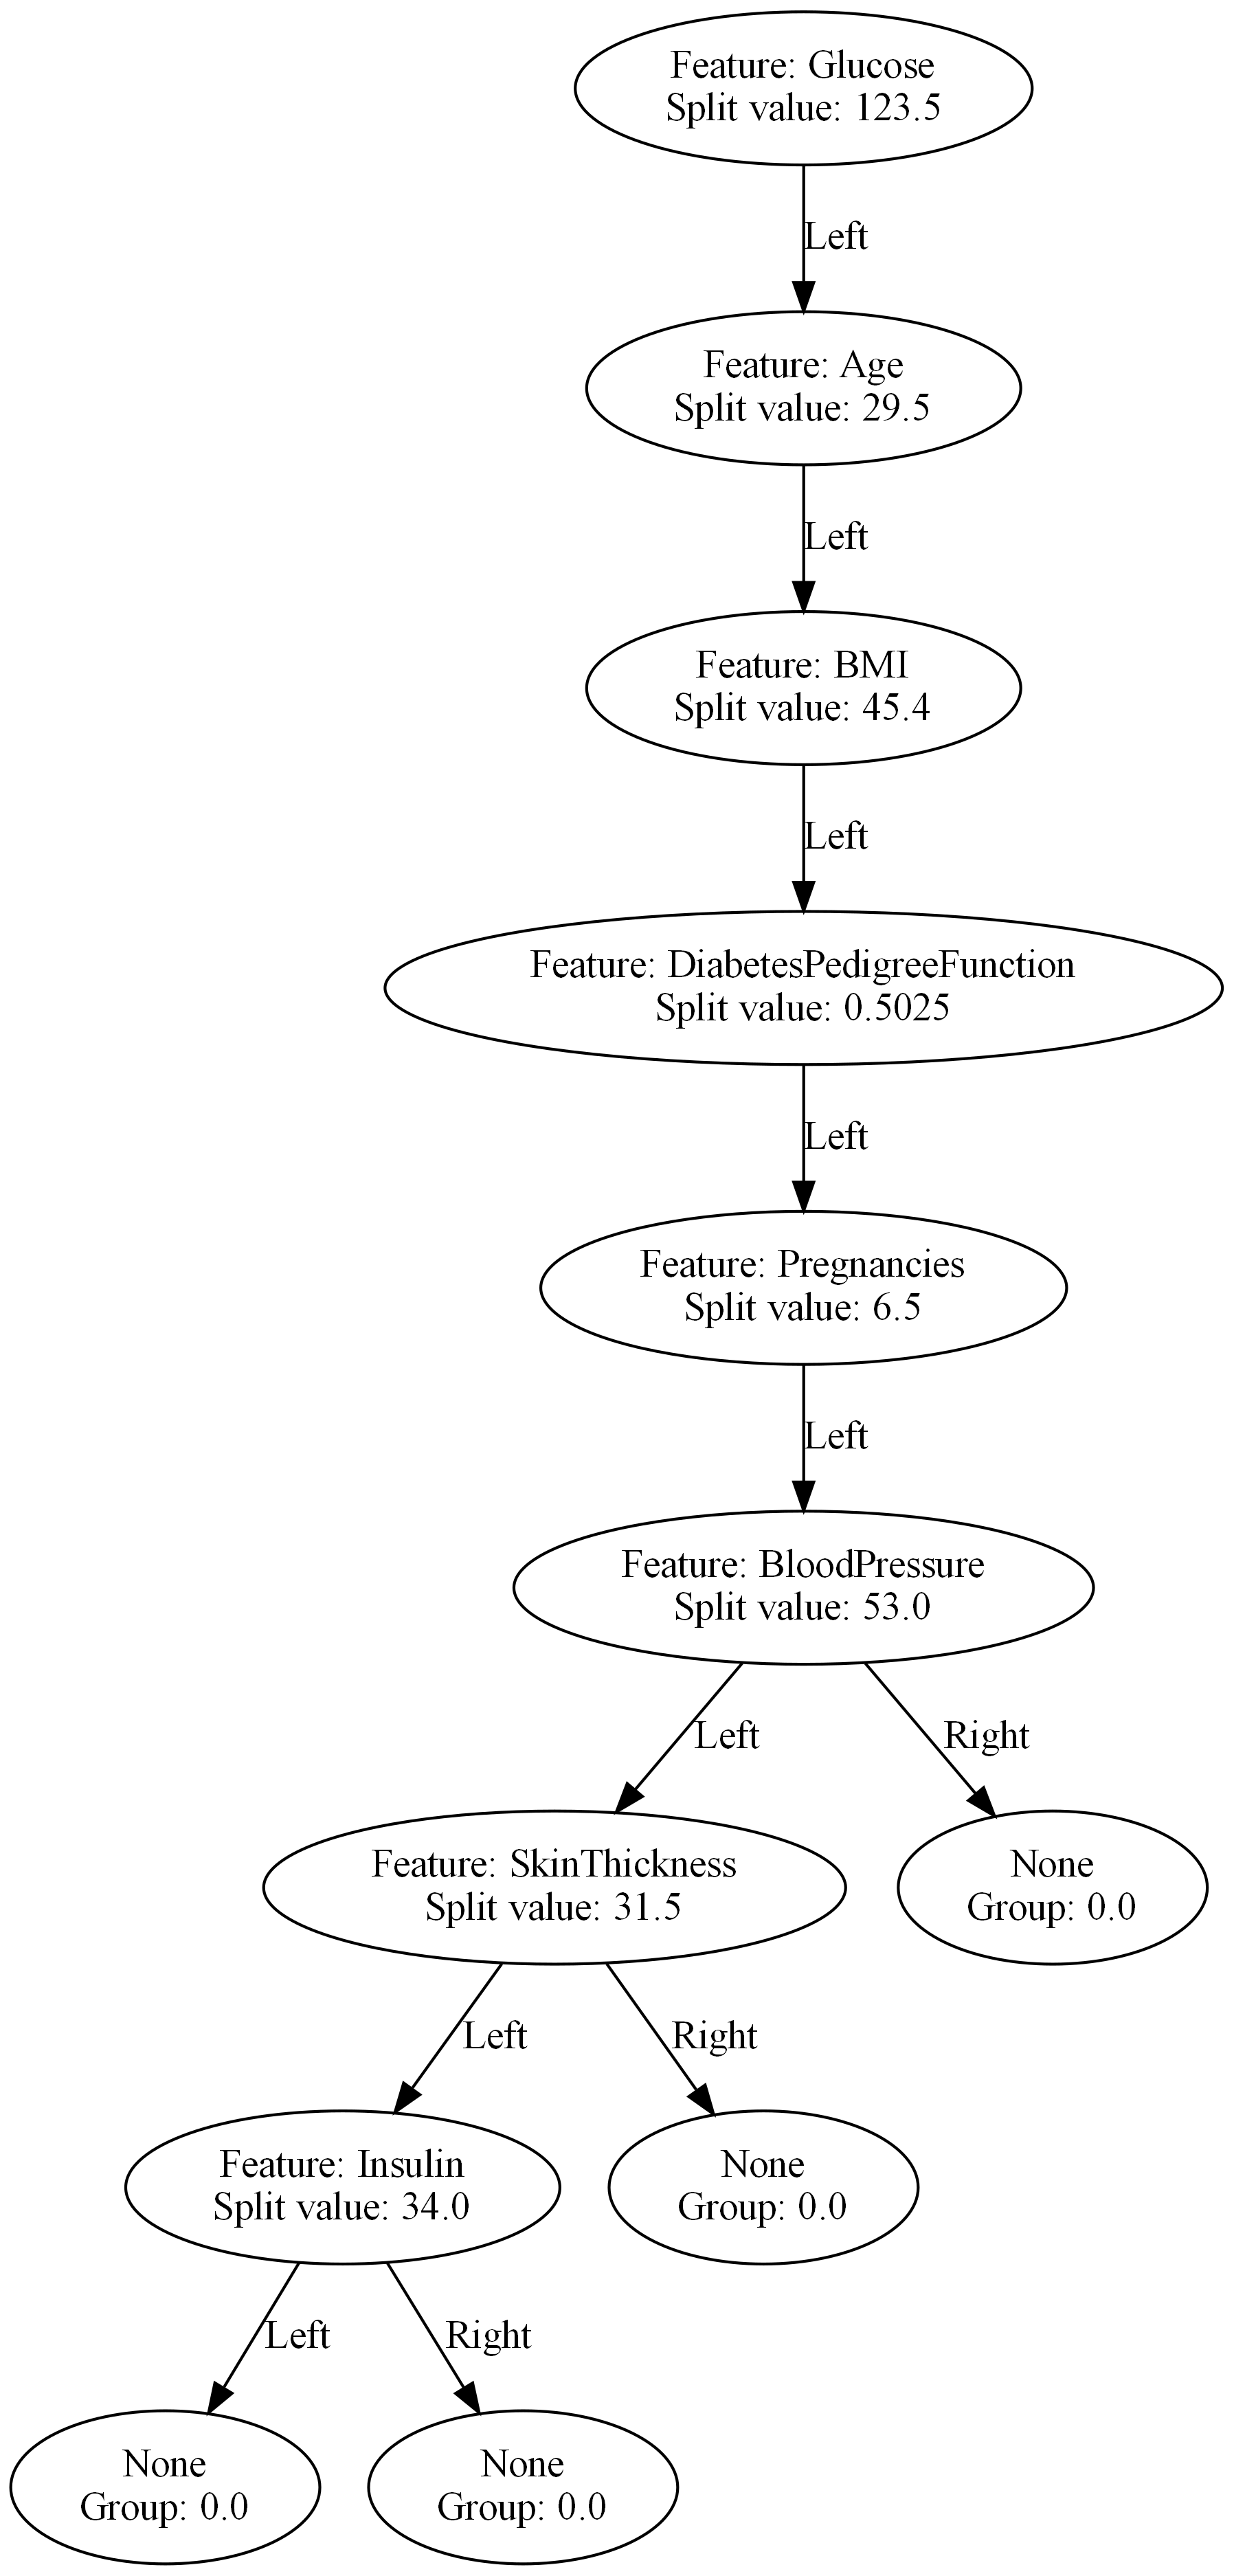

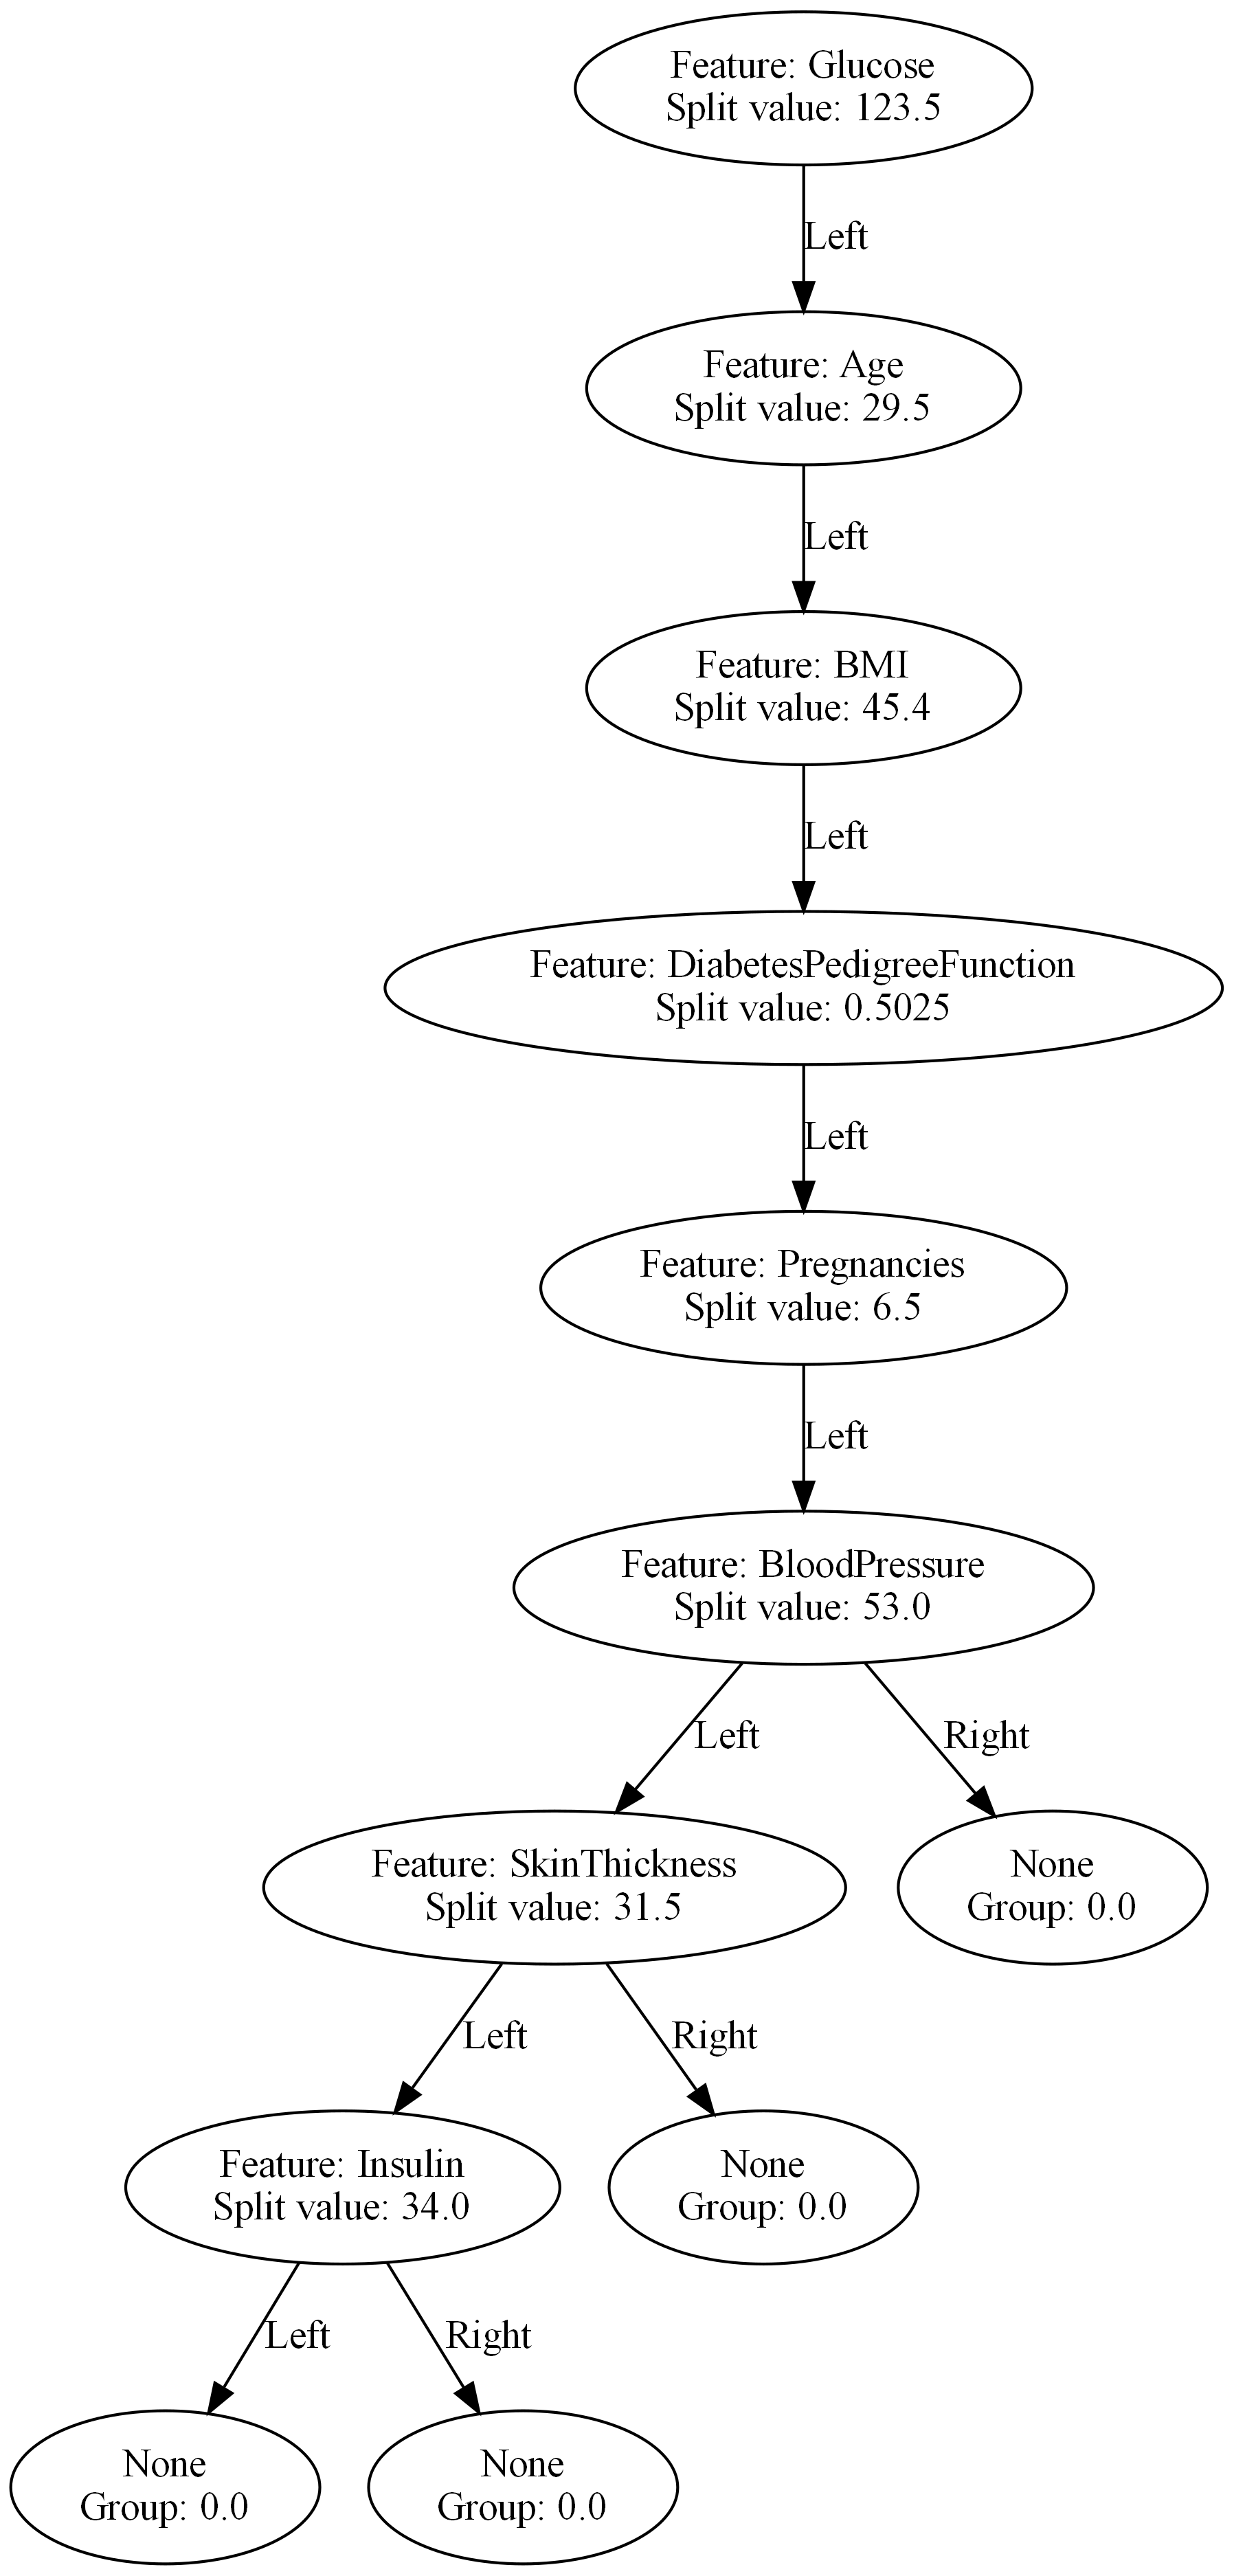

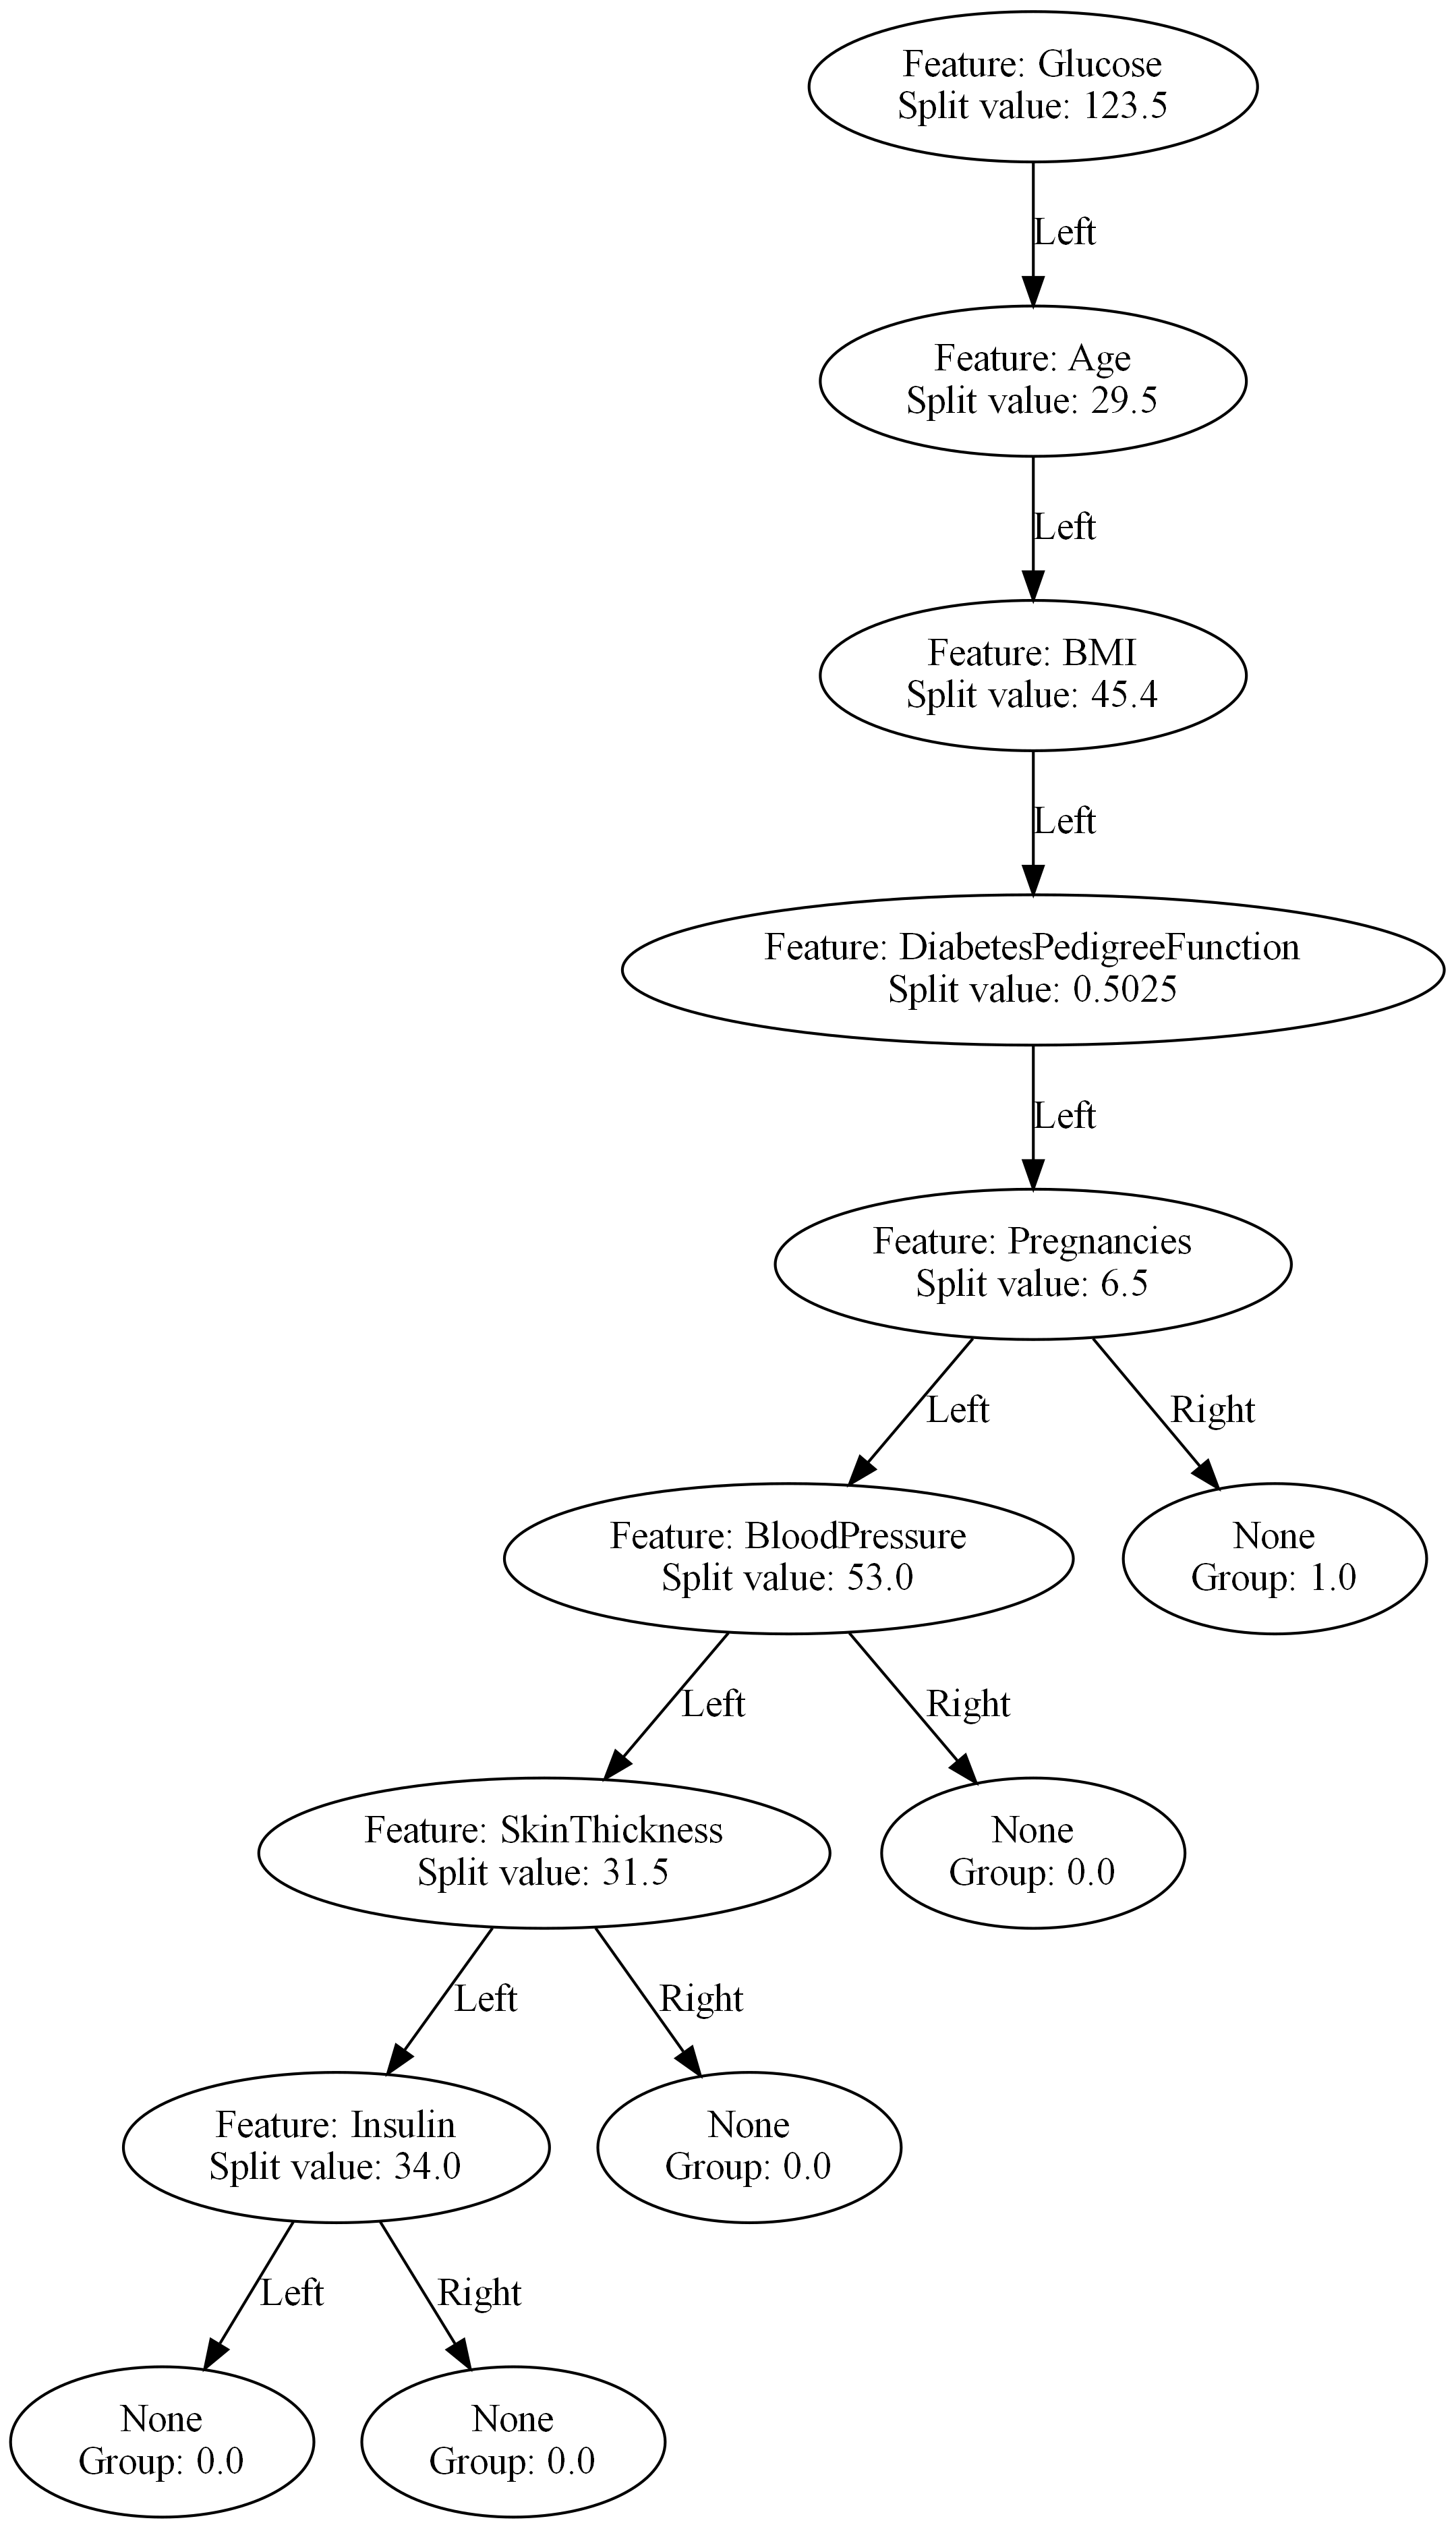

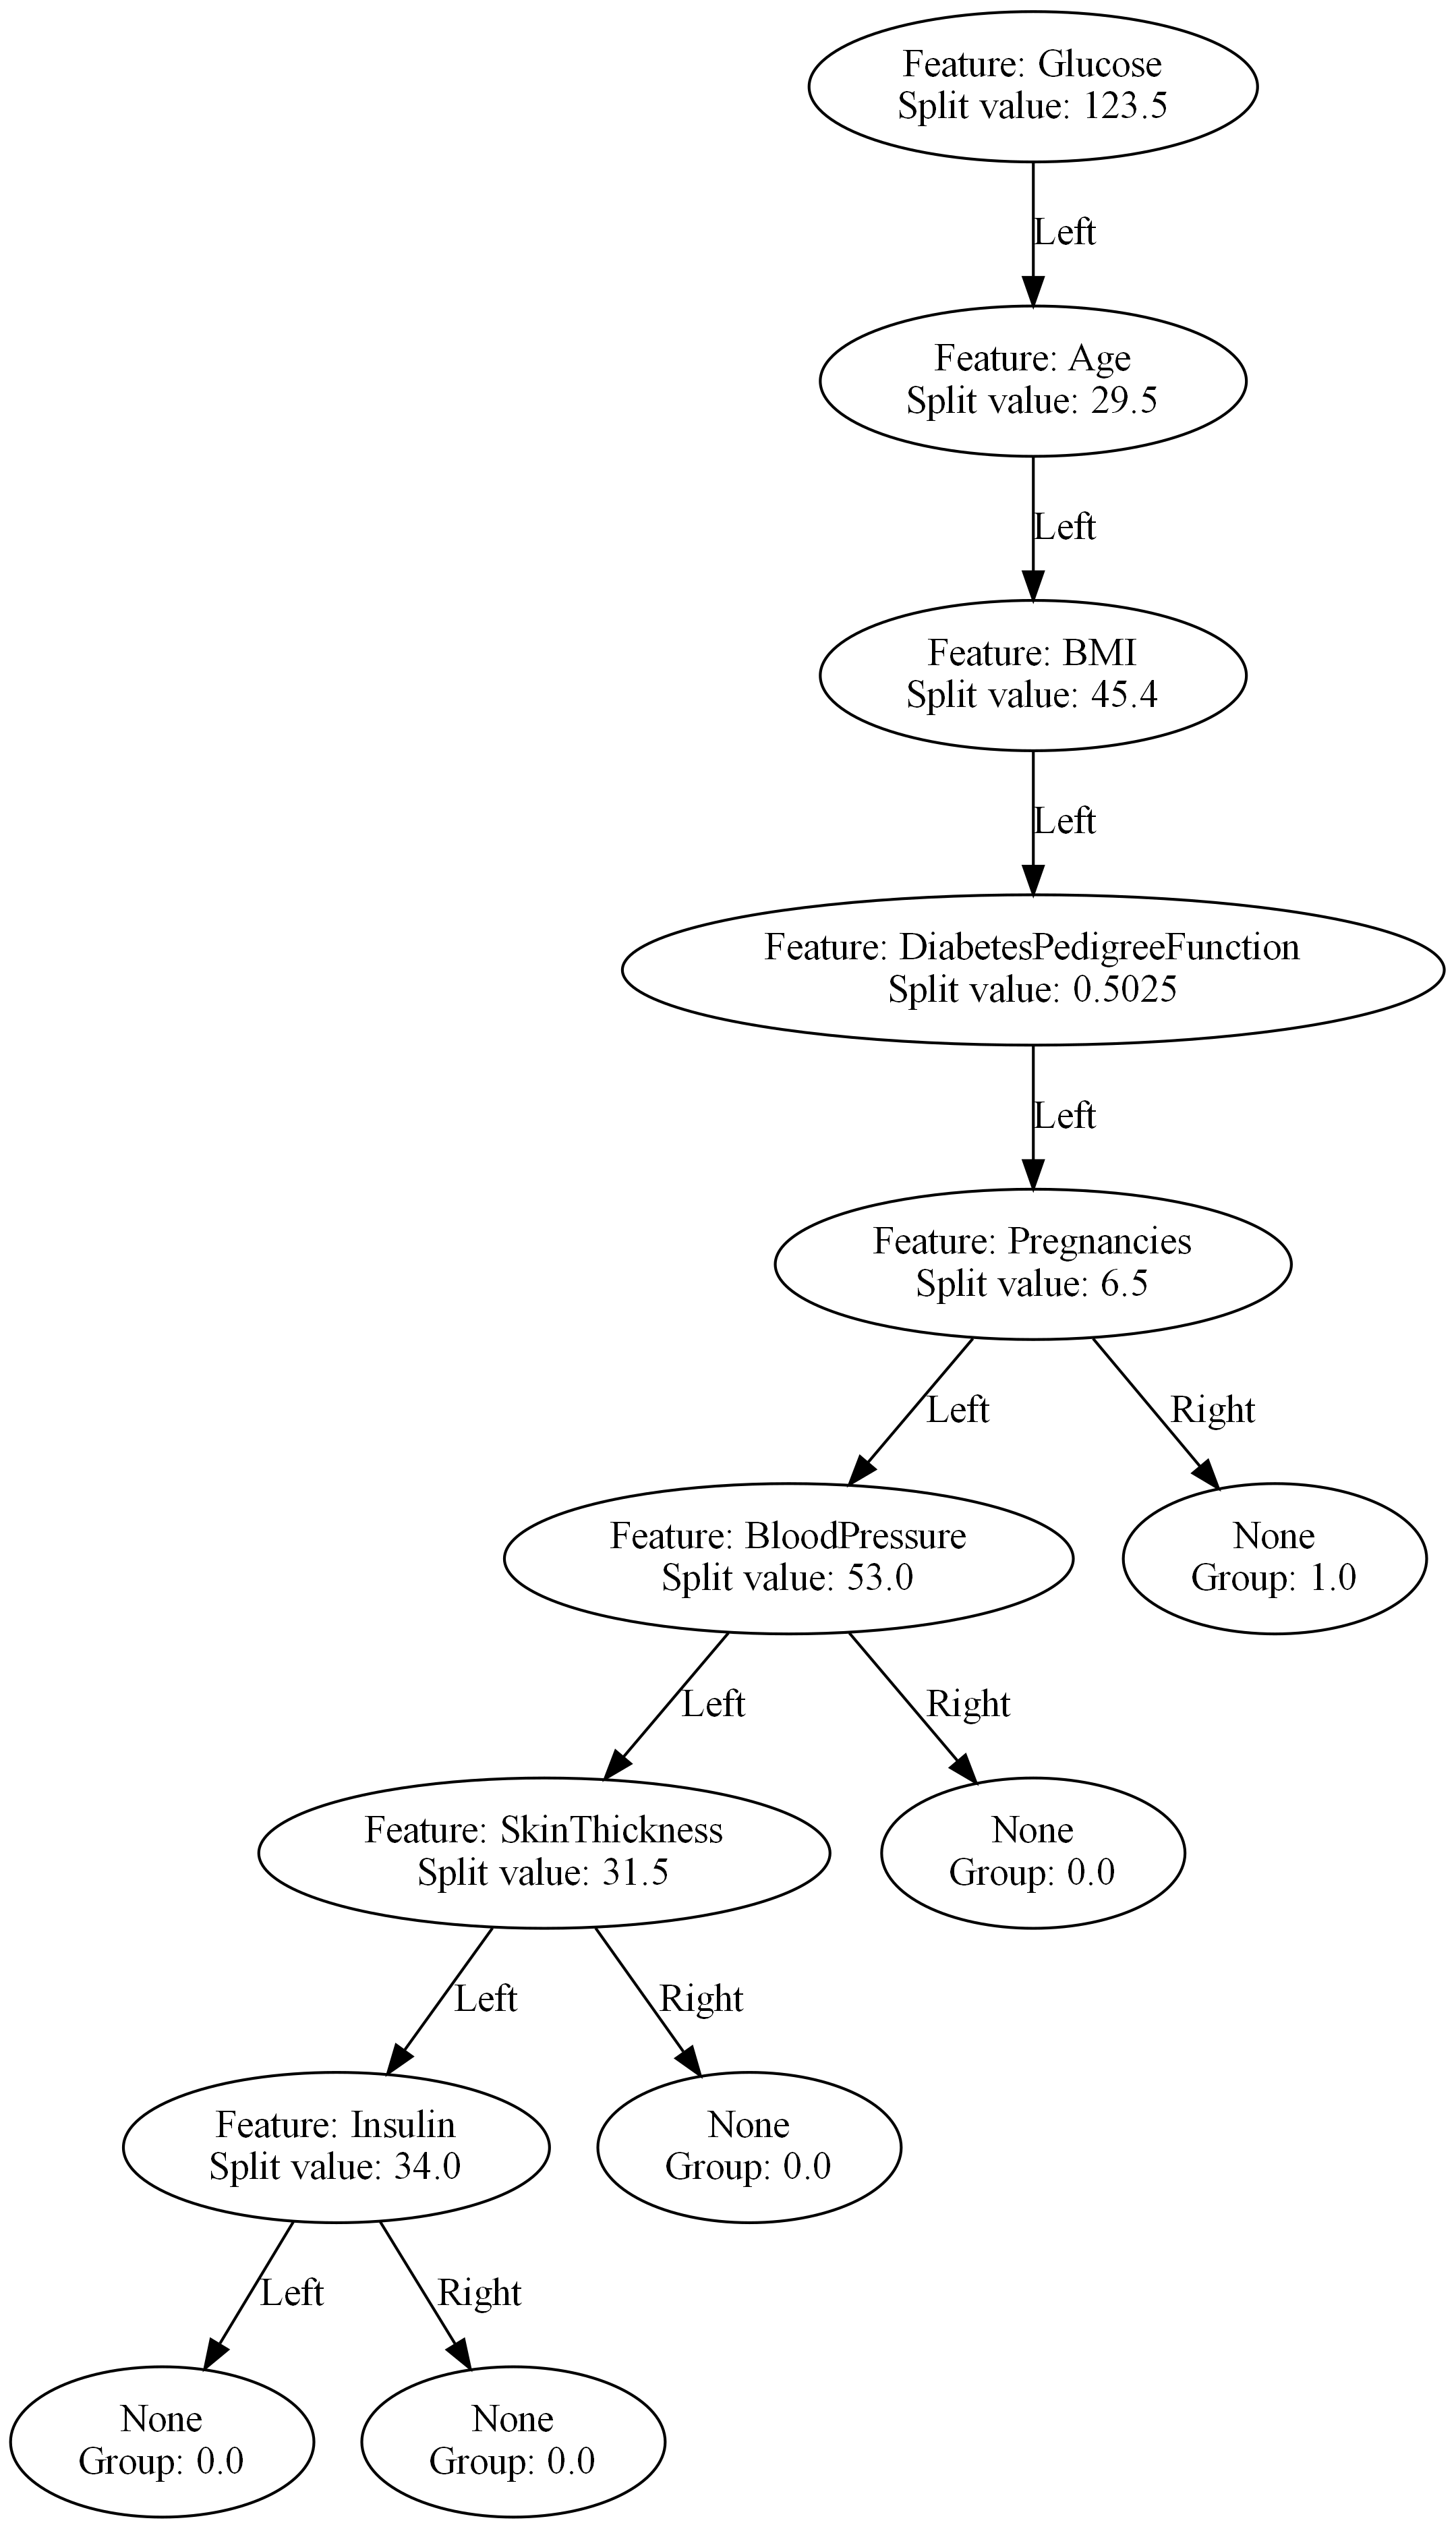

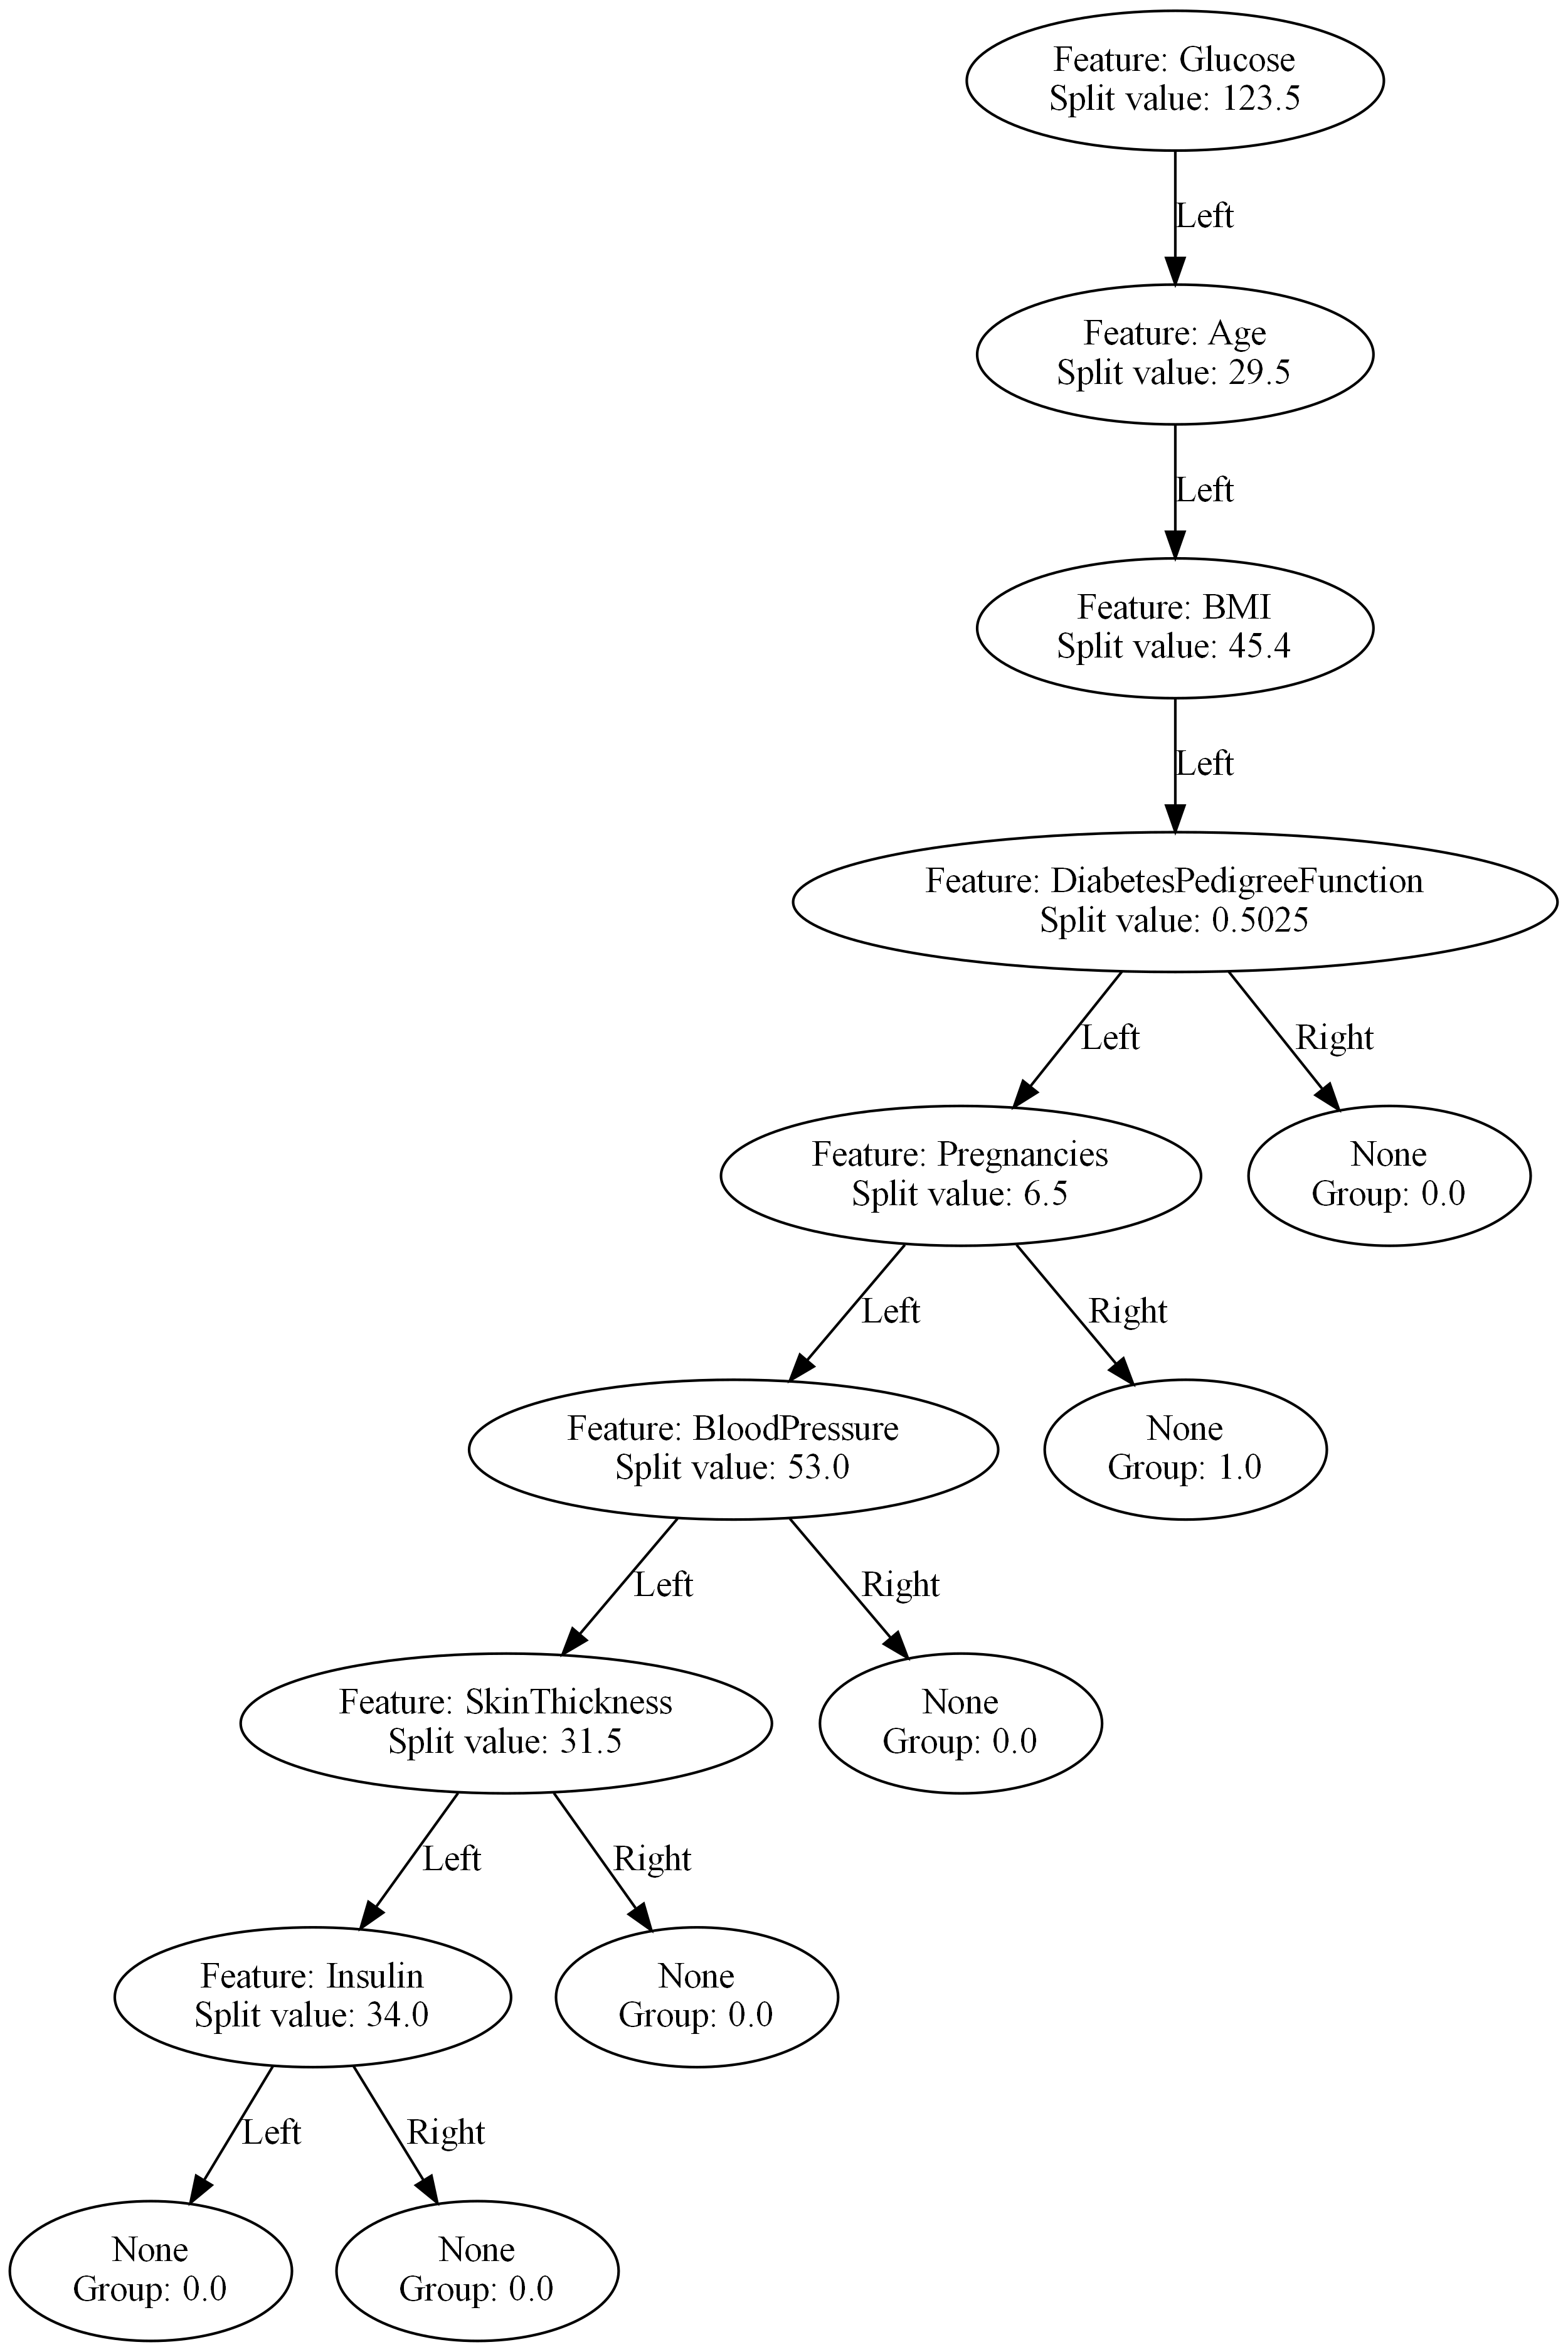

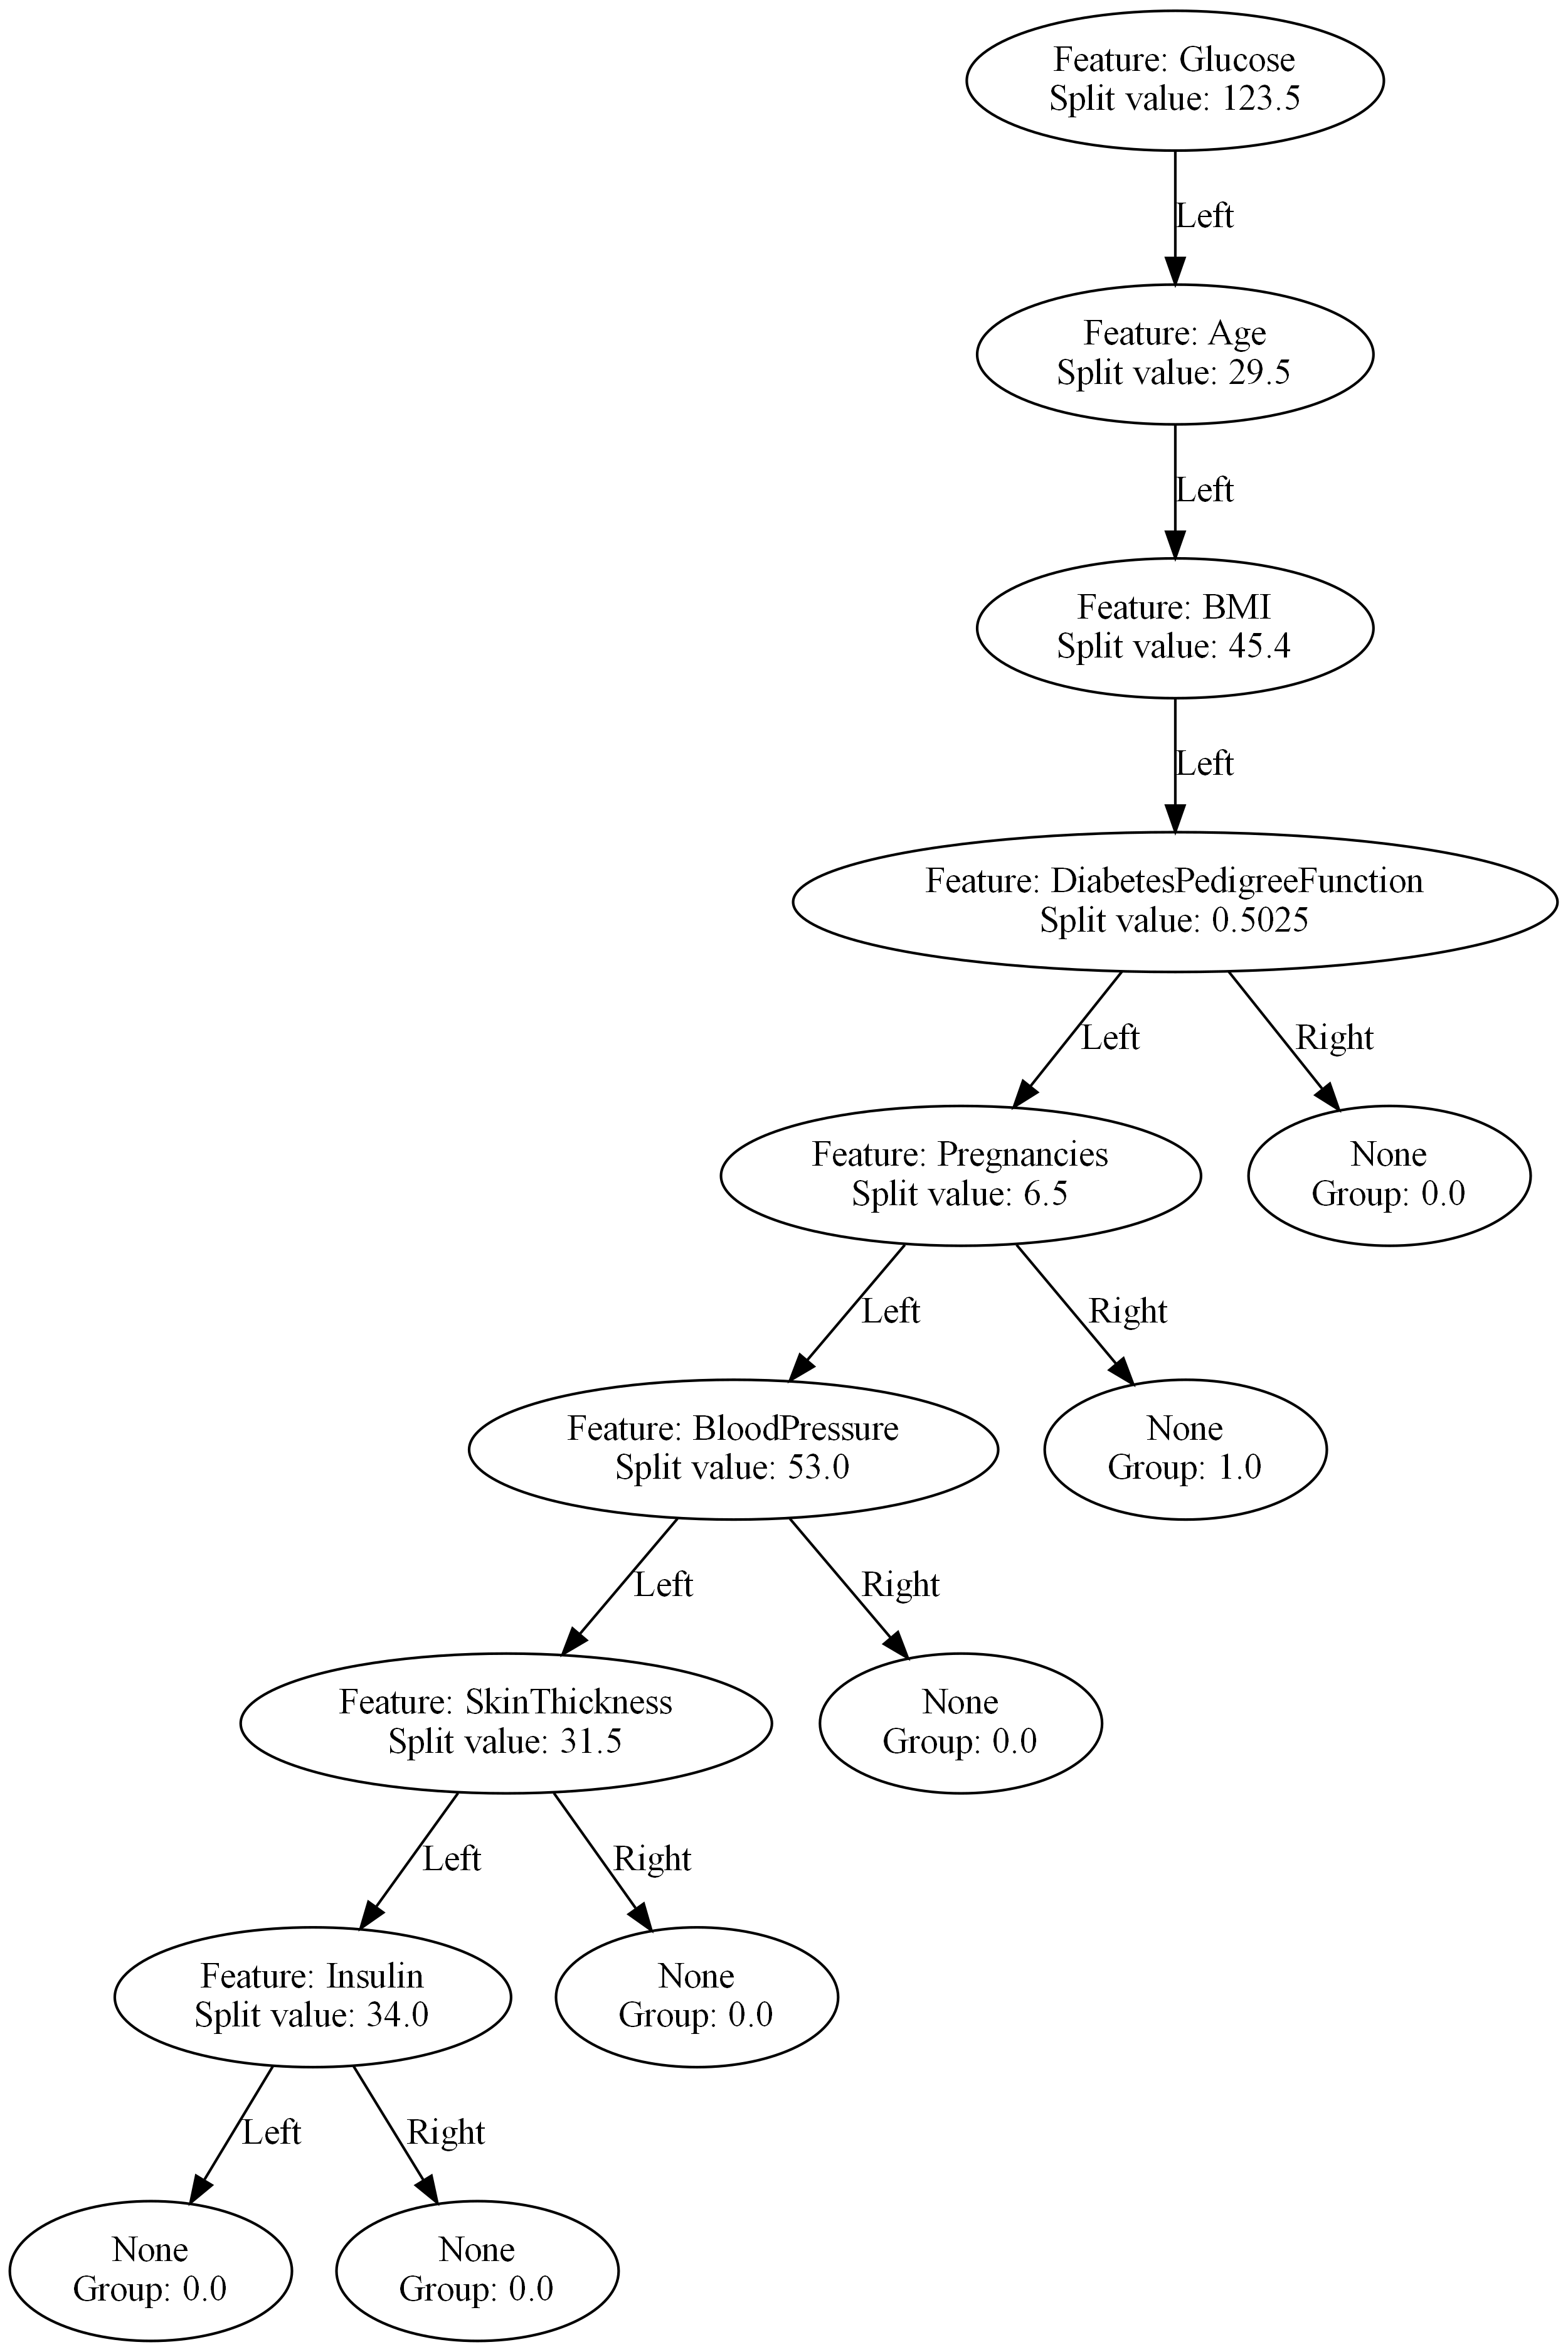

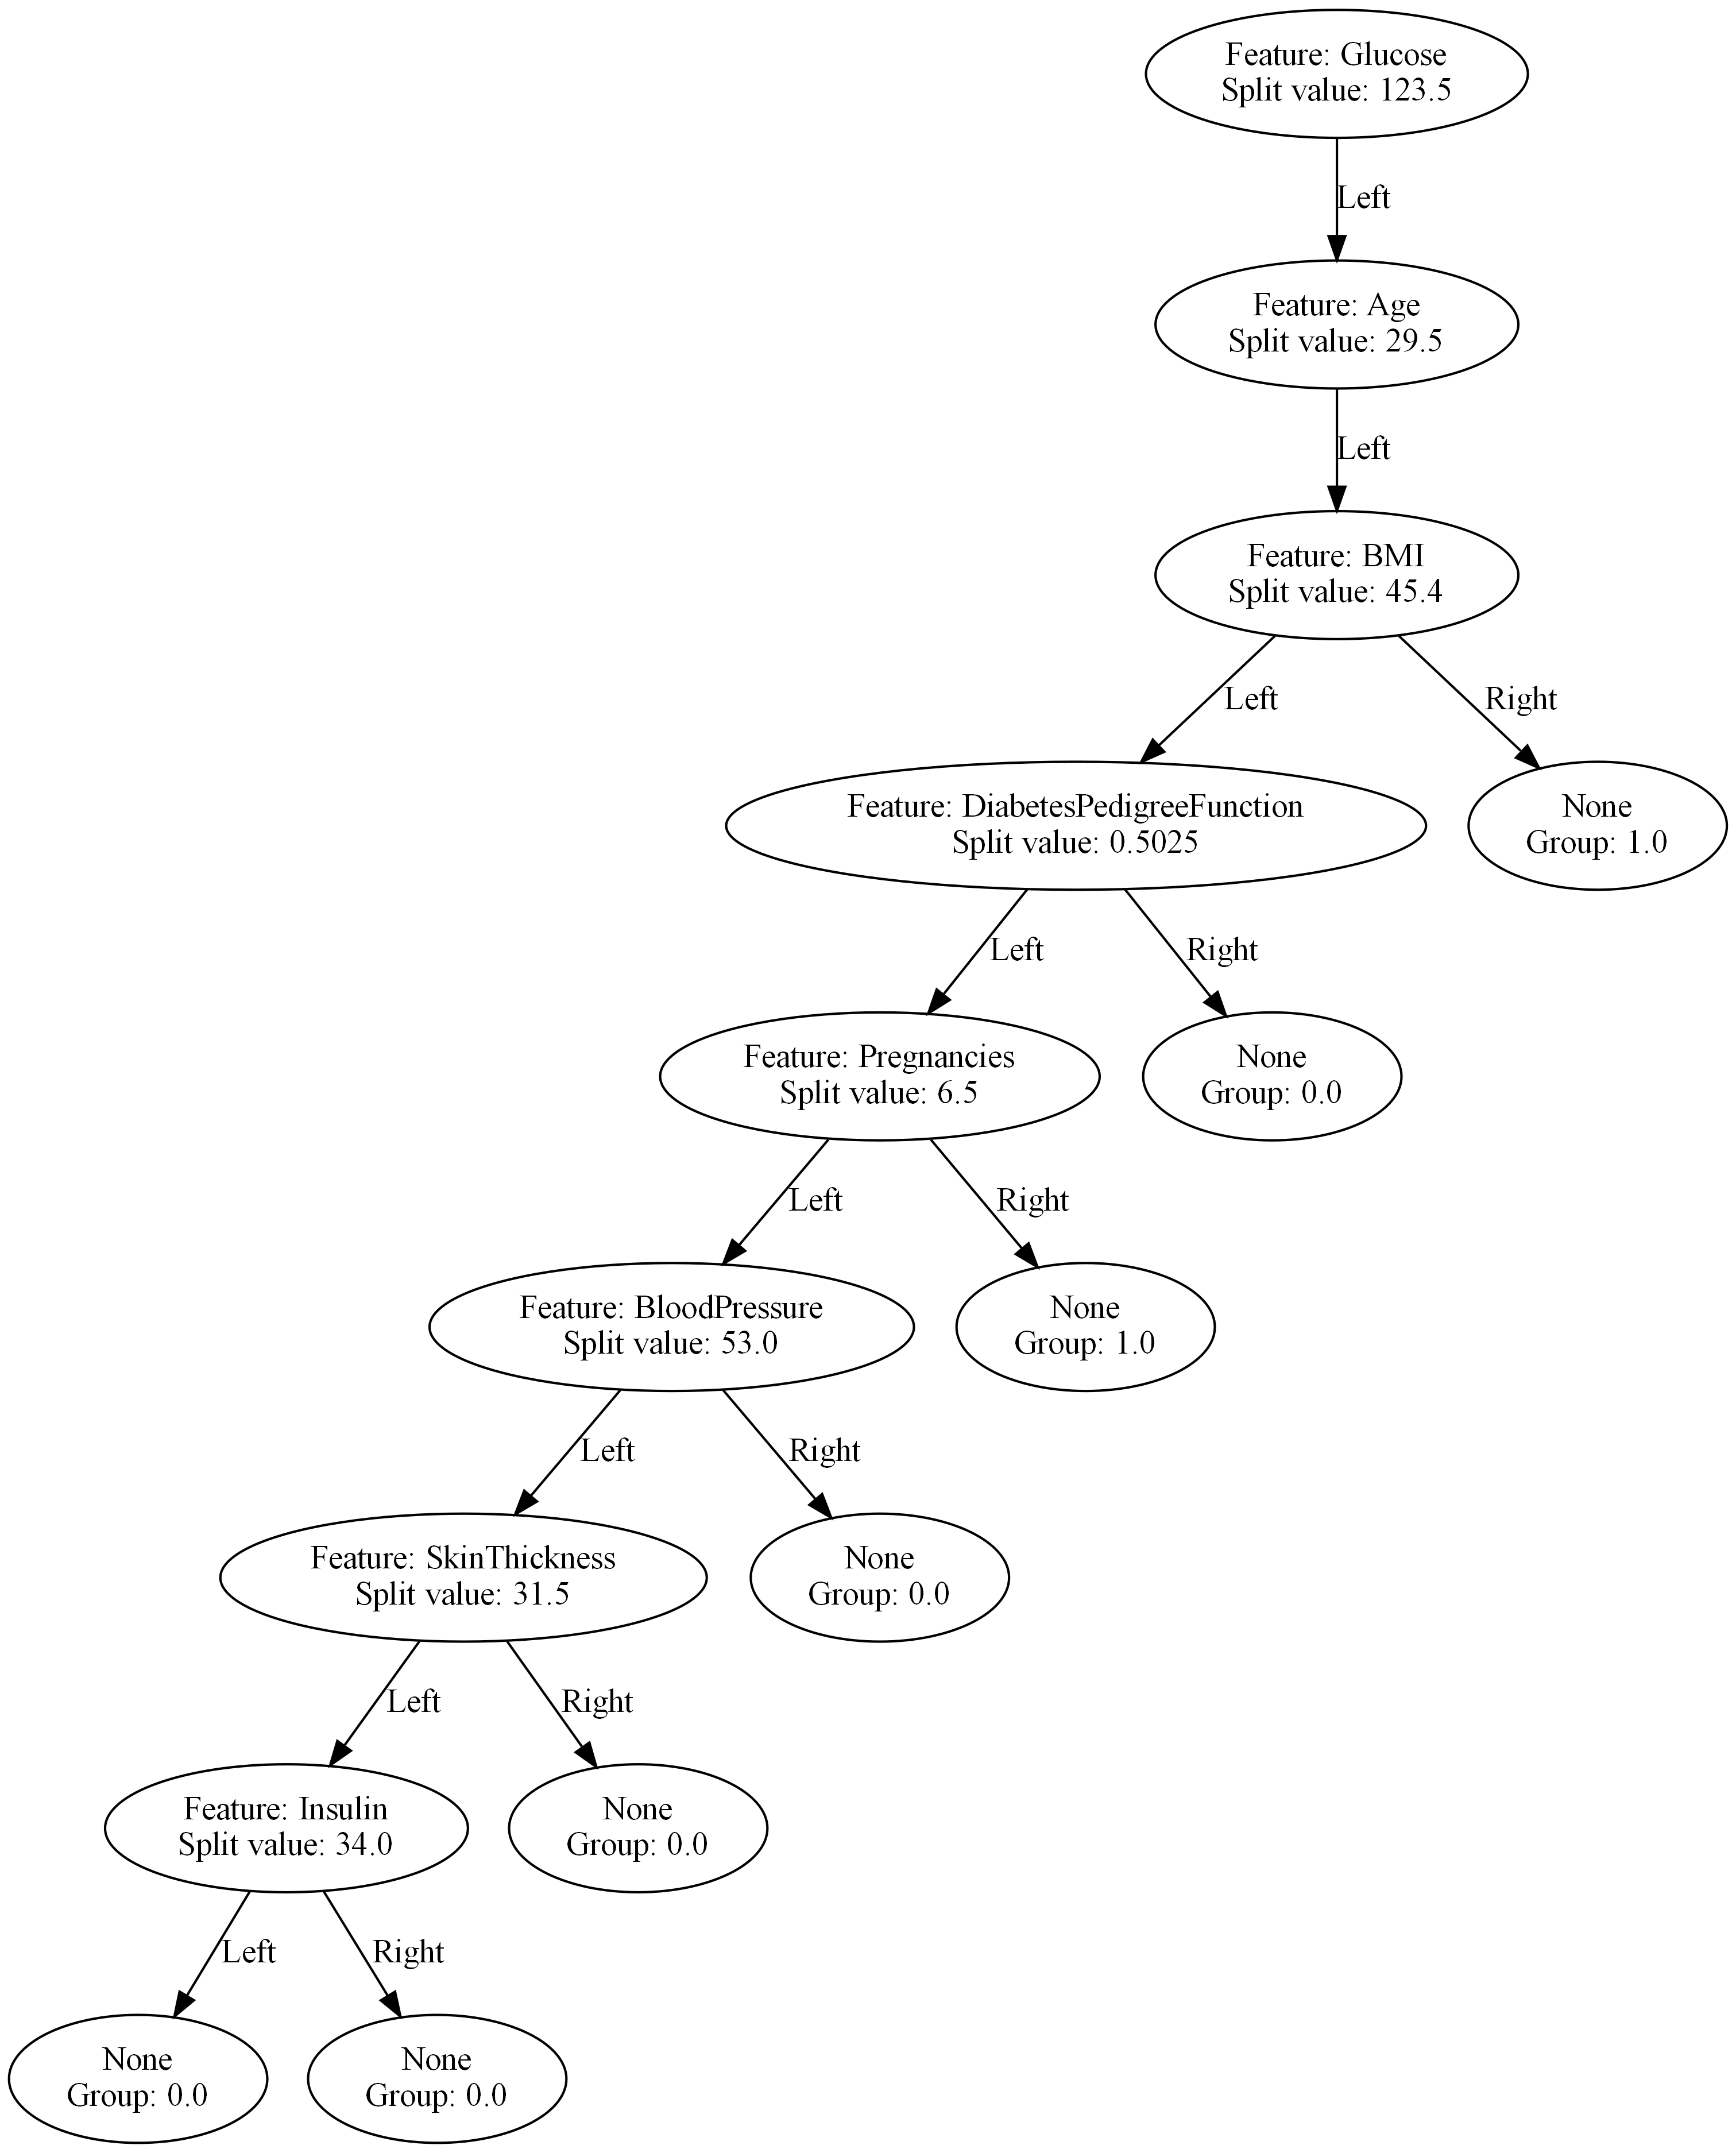

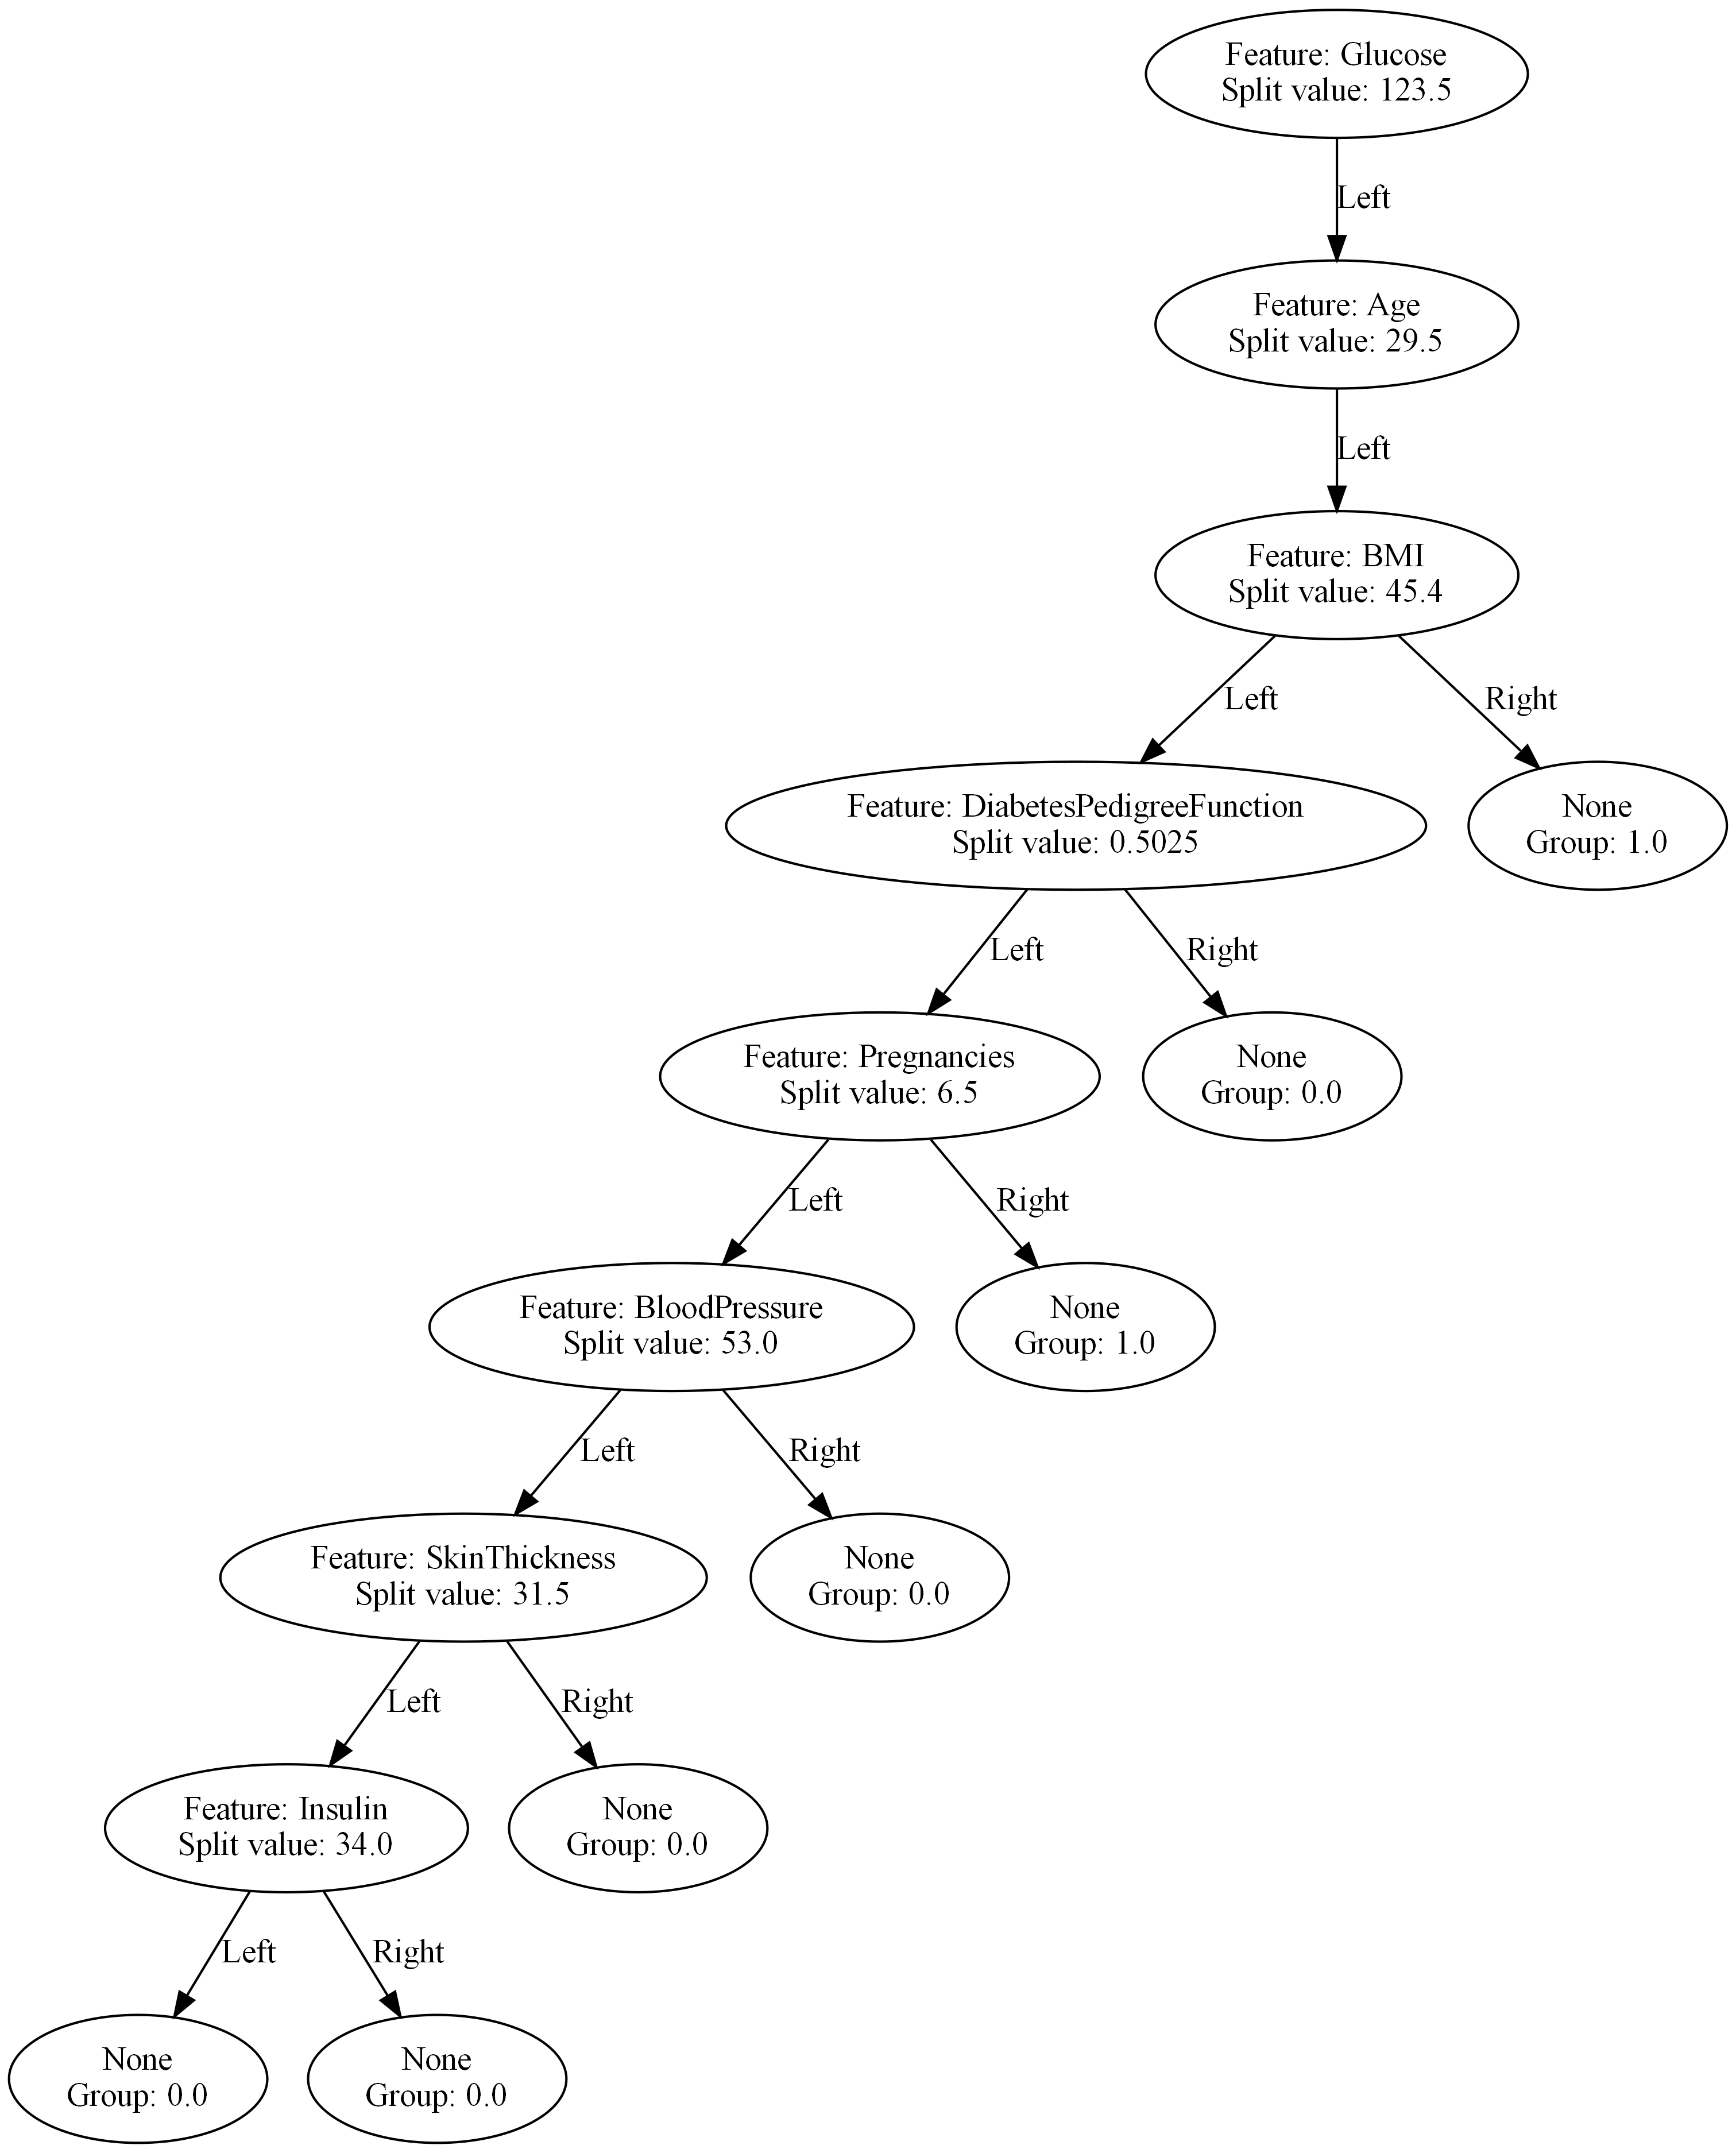

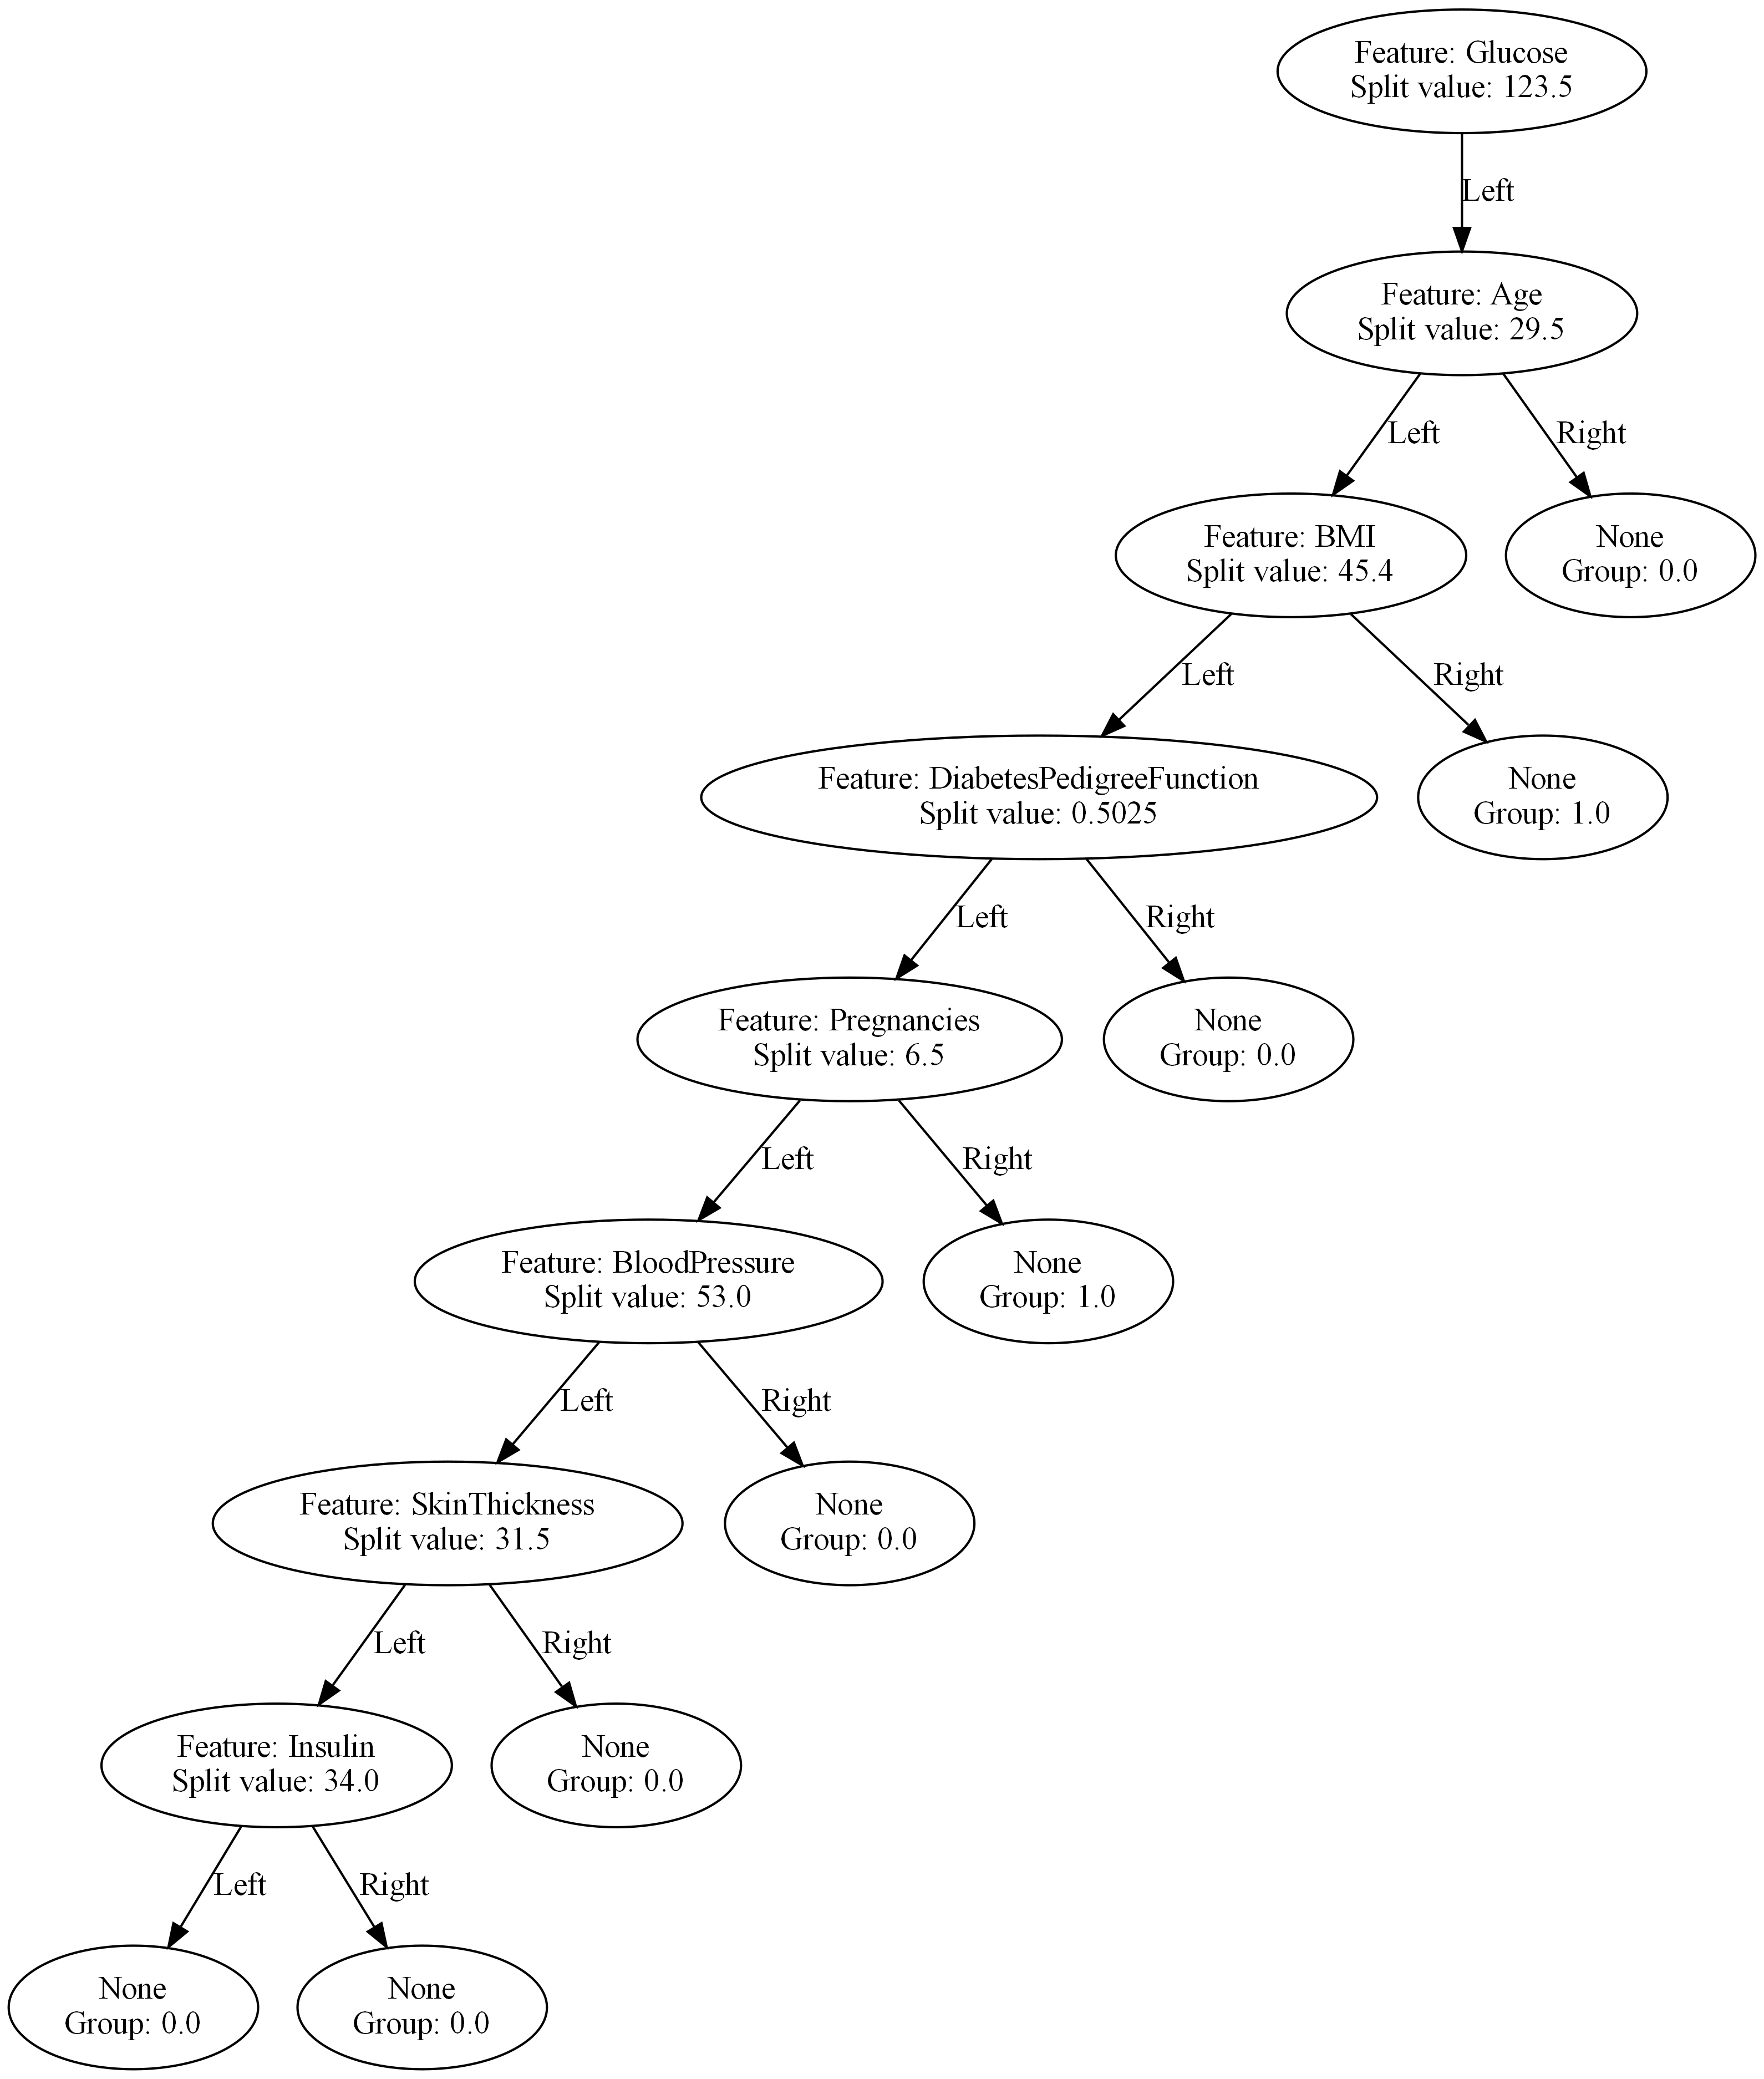

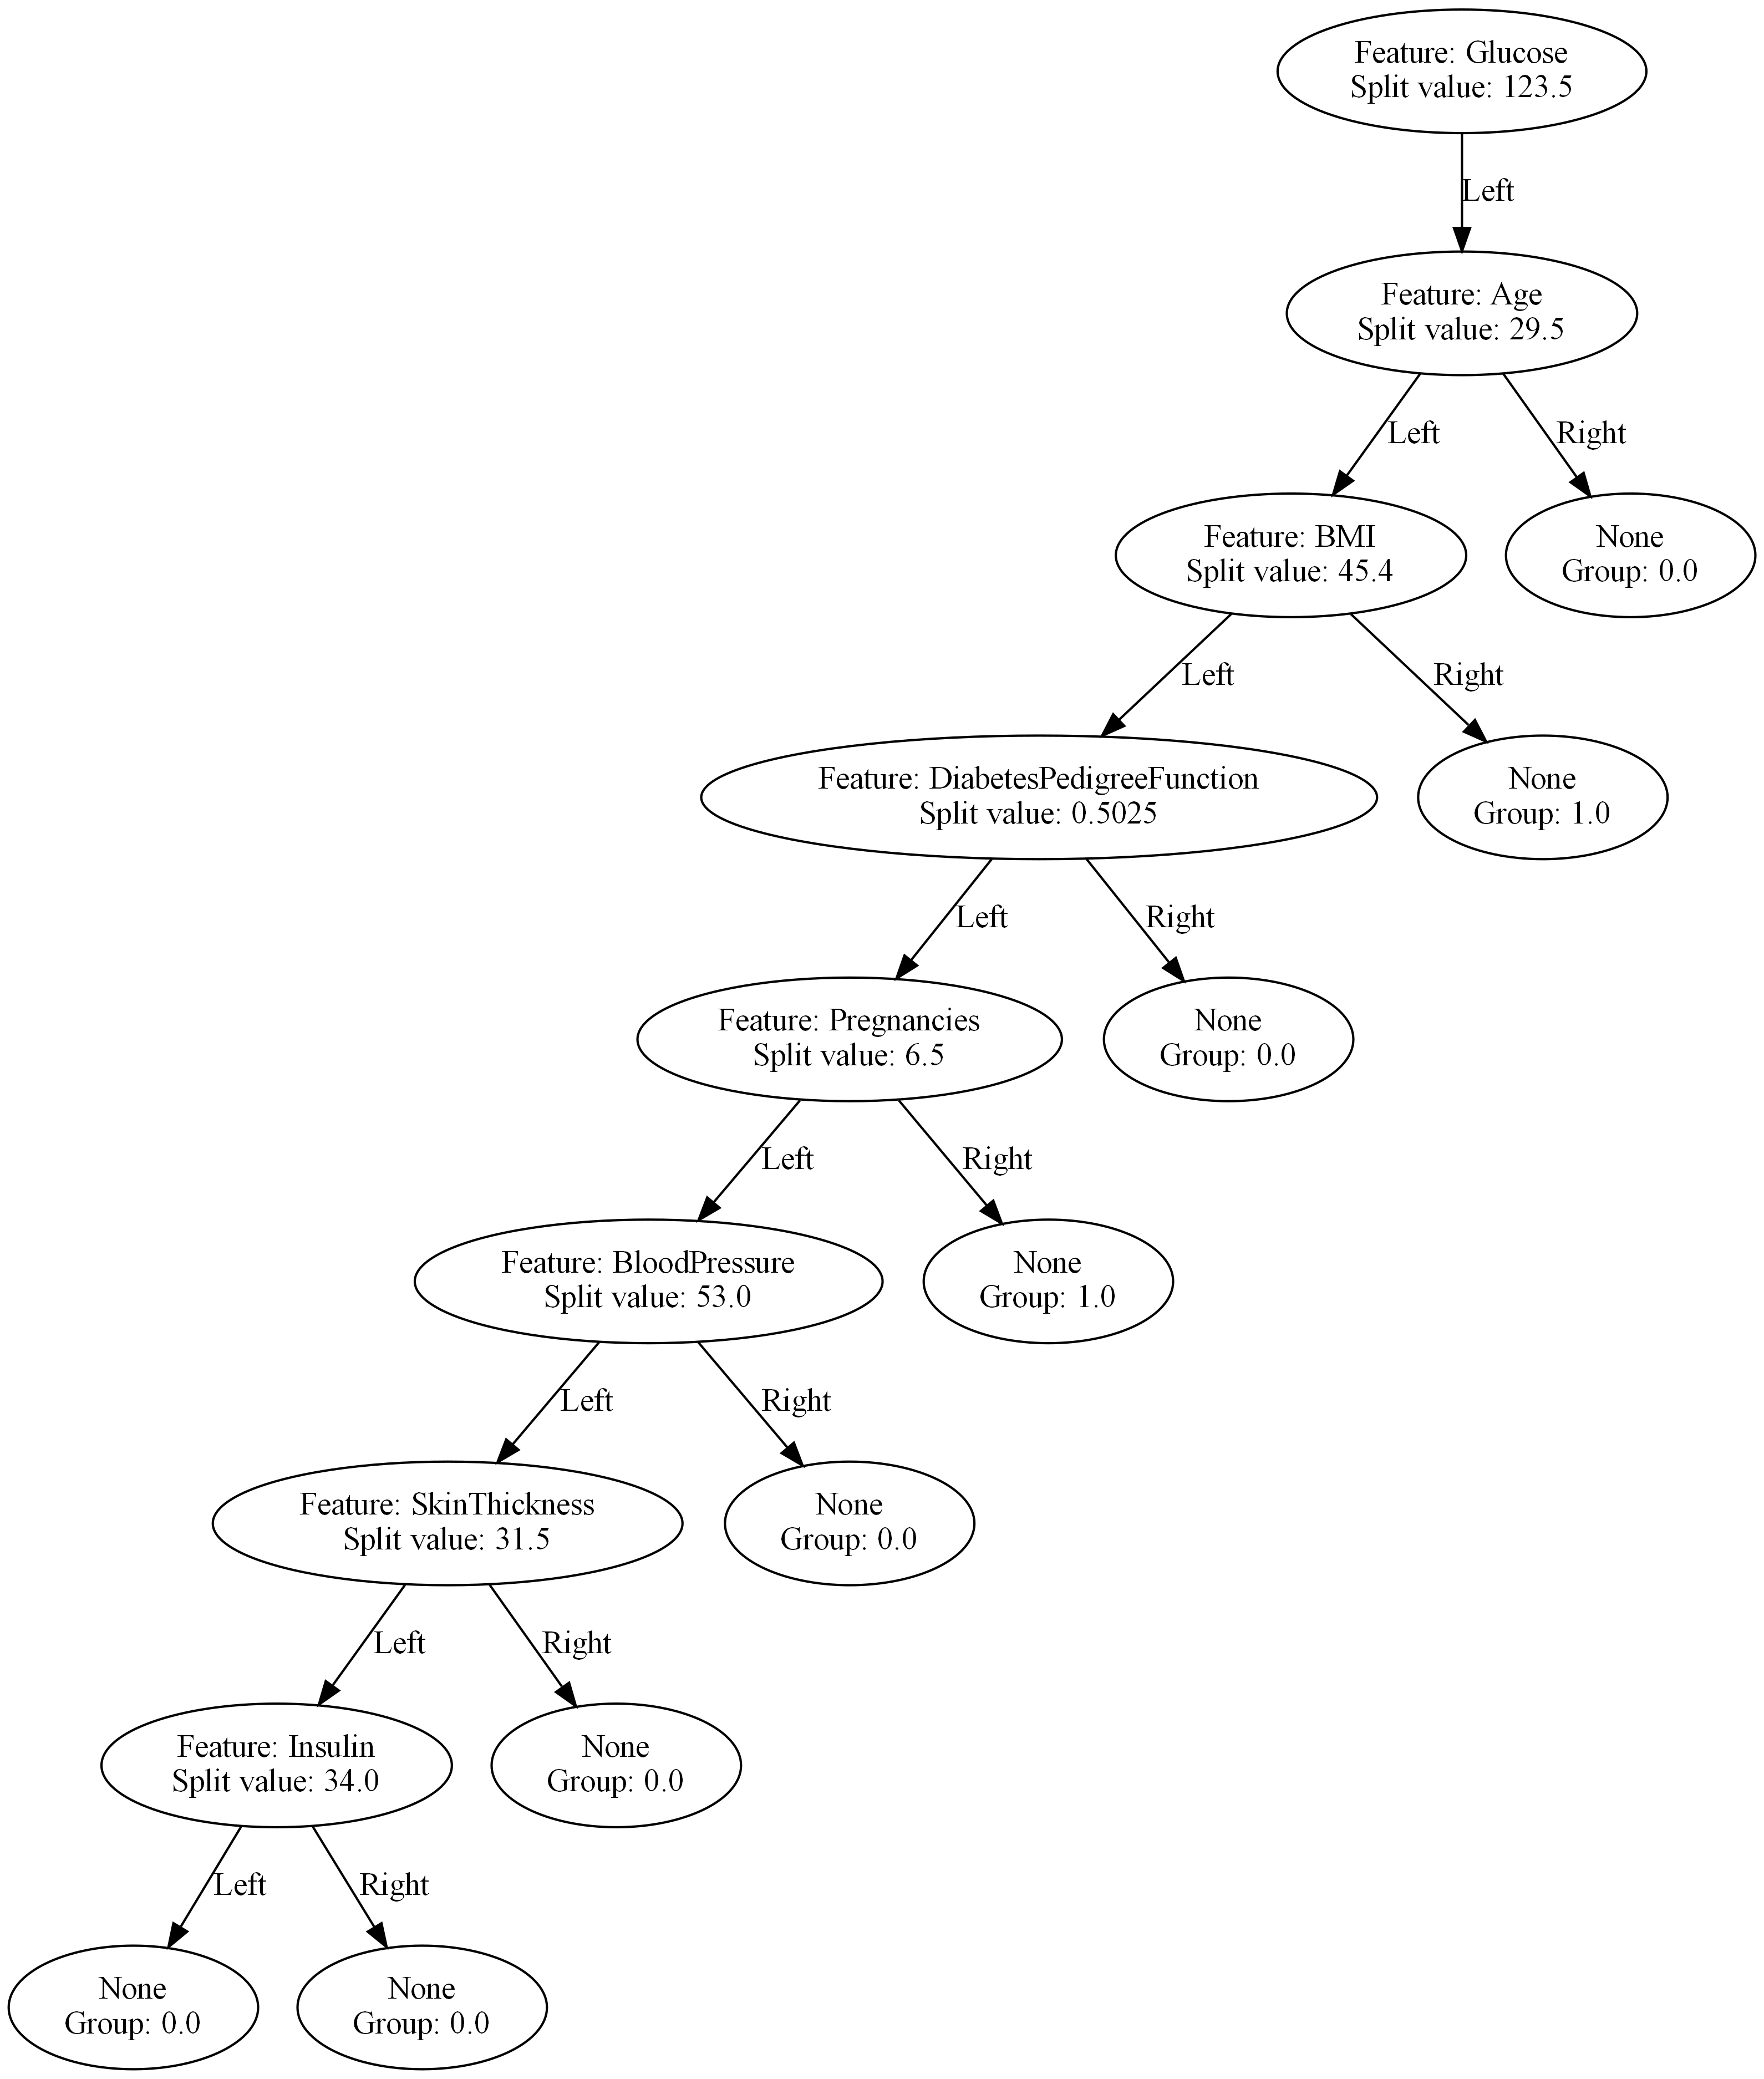

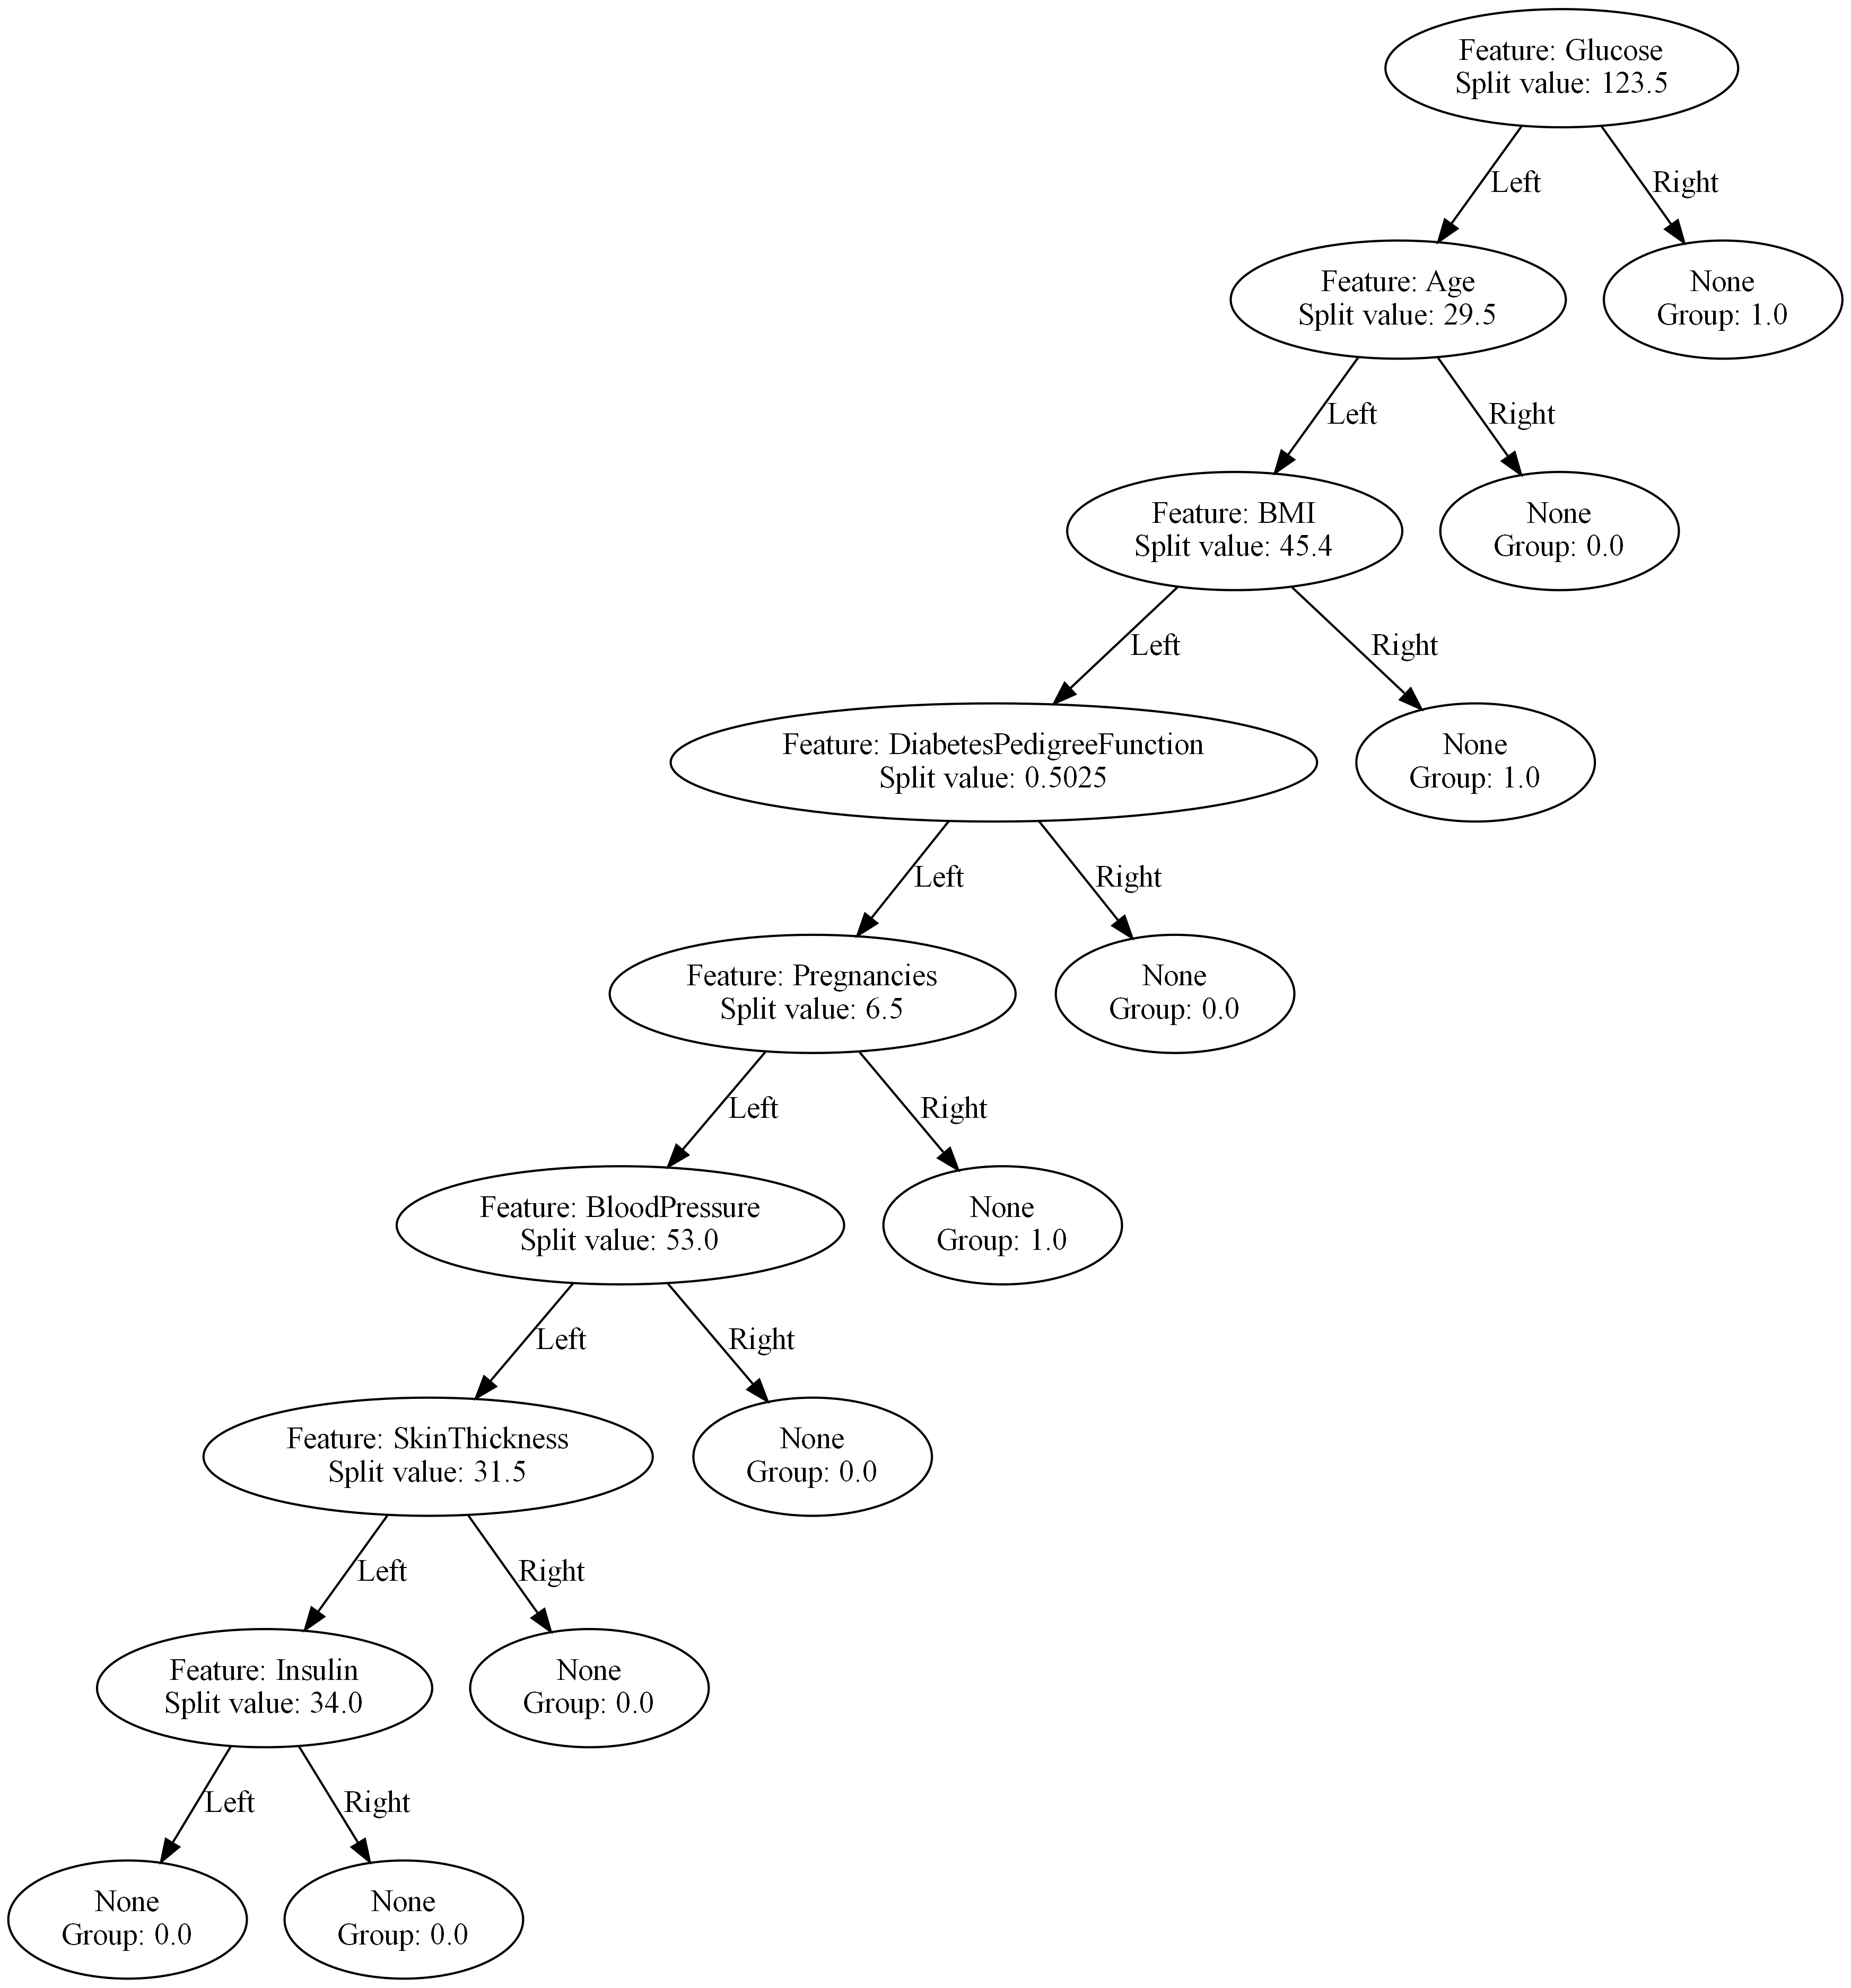

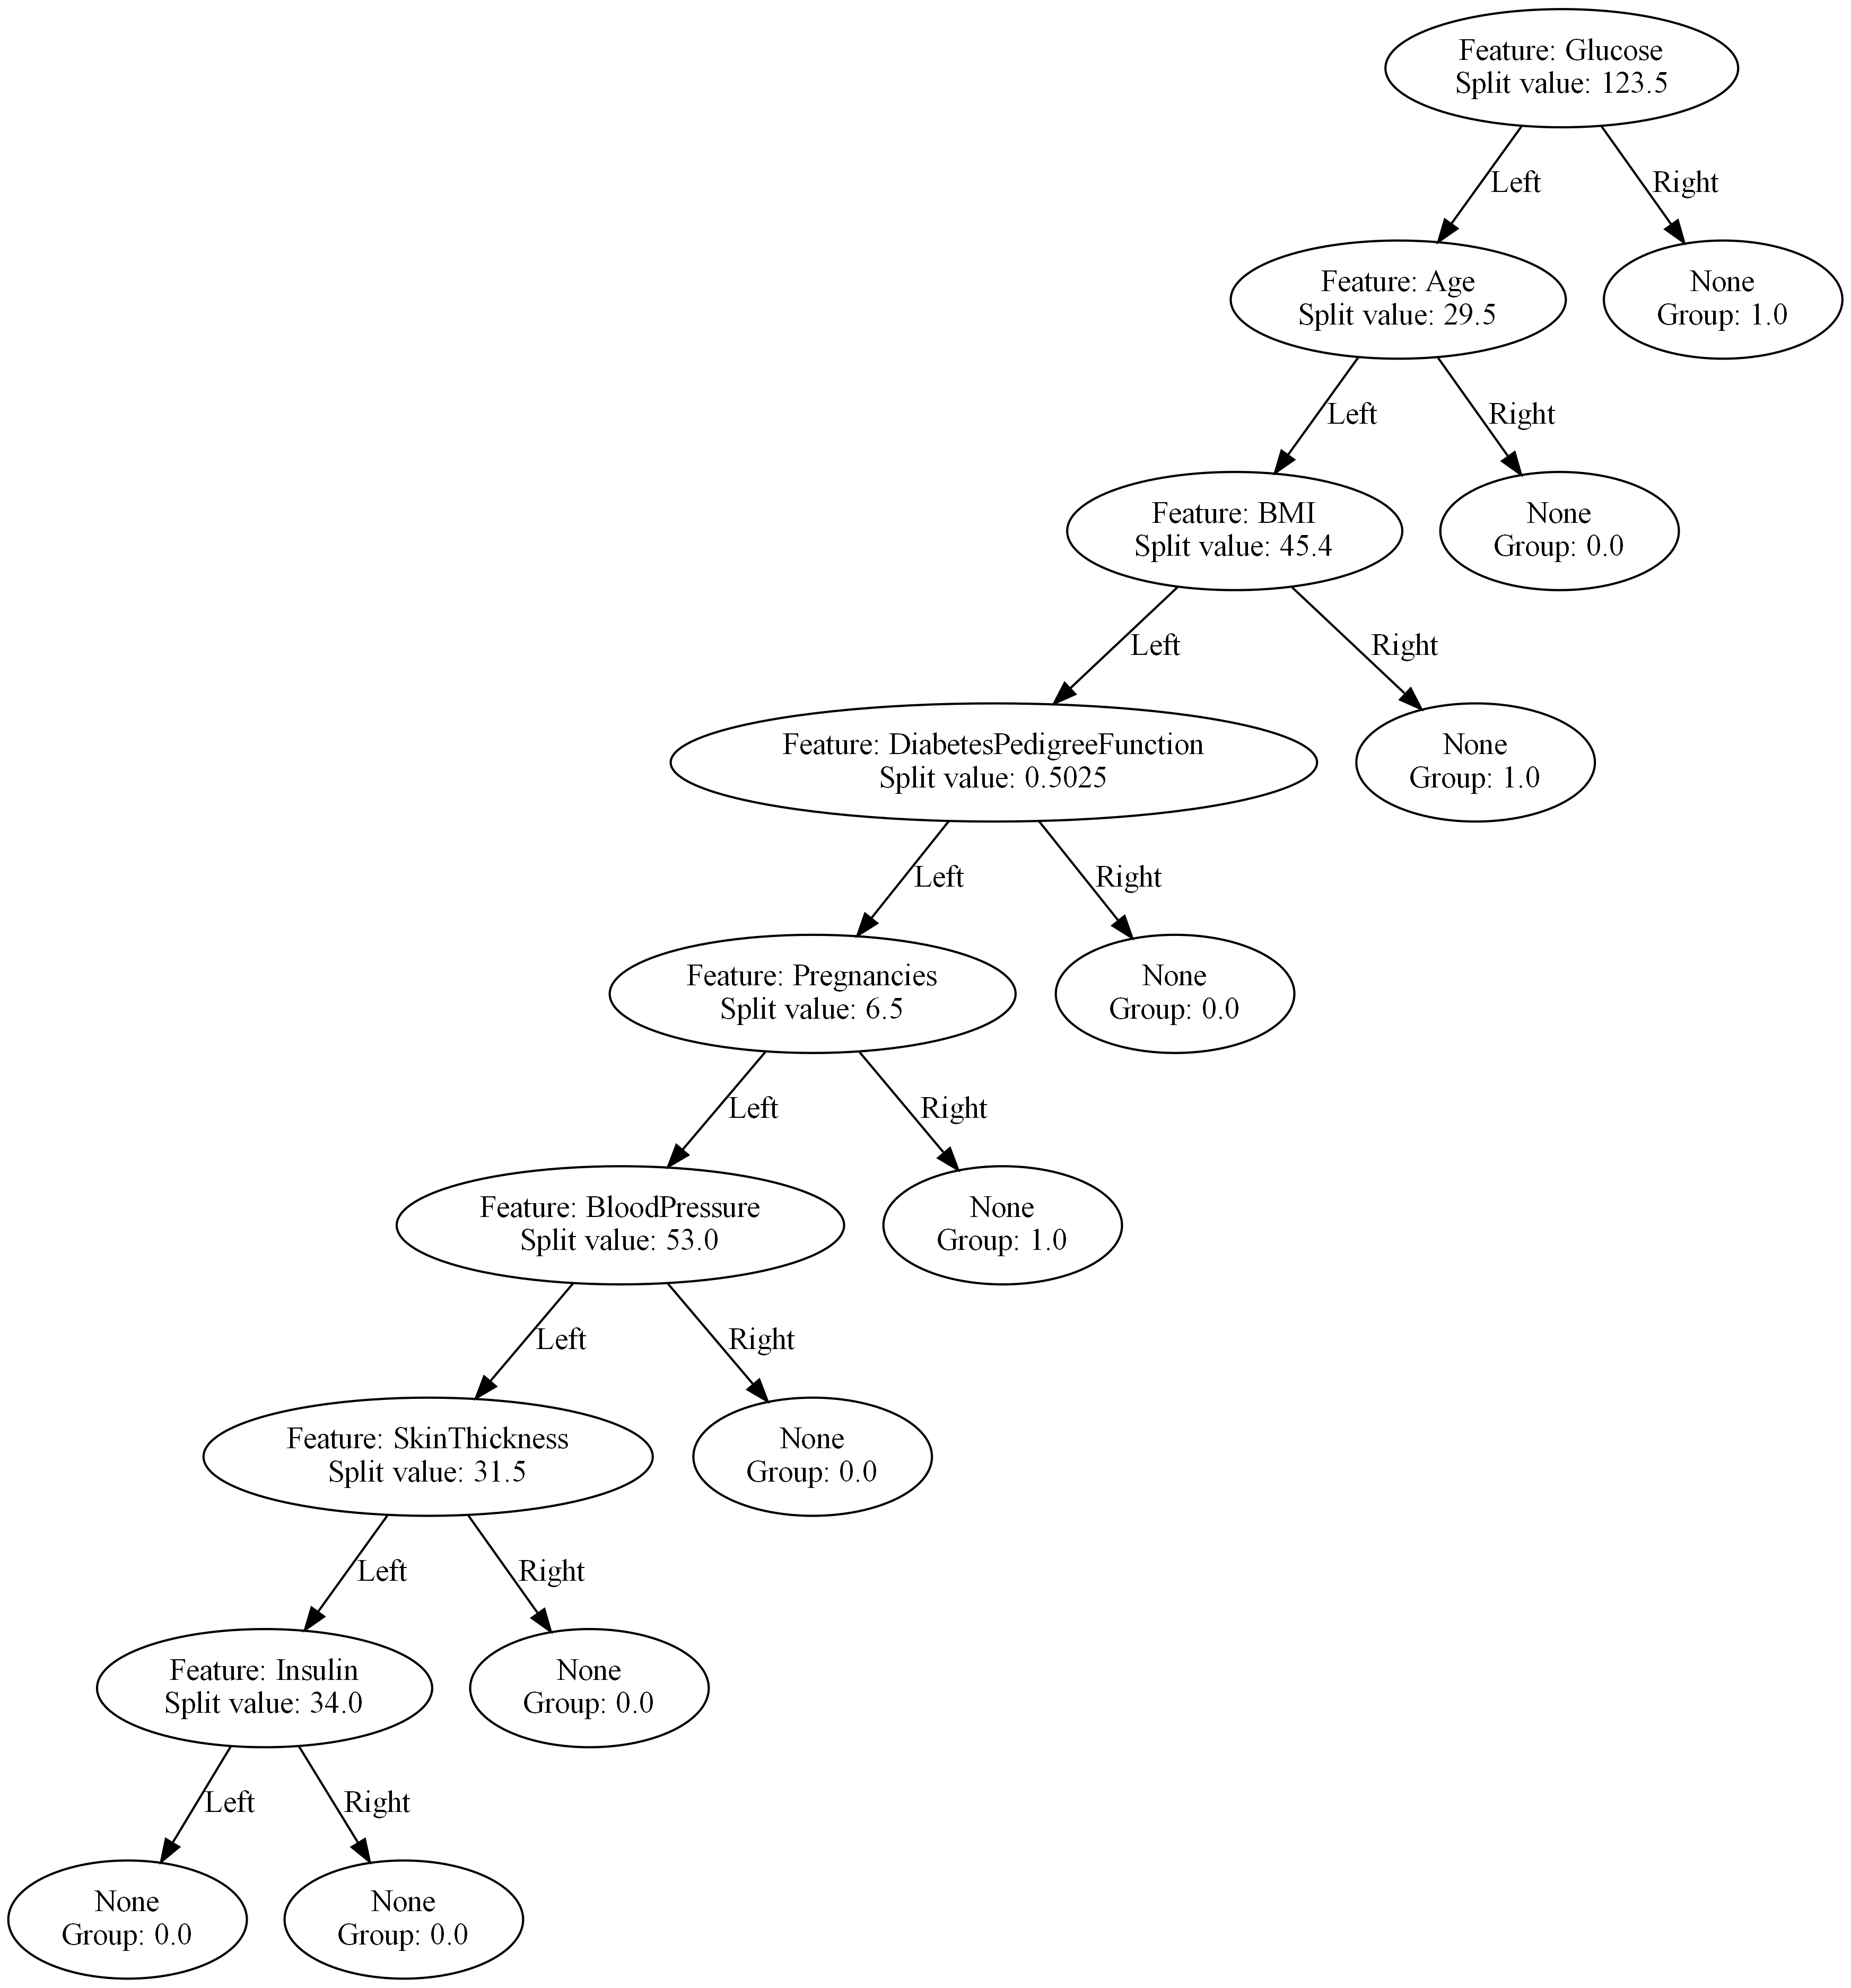

In [65]:
def visualize_tree(node, graph=None):
    if graph is None:
        graph = Digraph(format='png')
        graph.attr(dpi='300')

    node_label = f"{node.name}\nGroup: {node.group}" if node.is_leaf else f"Feature: {node.name}\nSplit value: {node.c_value}"
    graph.node(str(node), label=node_label)

    if node.data_left:
        graph.edge(str(node), str(node.data_left), label="Left")
        visualize_tree(node.data_left, graph)

    if node.data_right:
        graph.edge(str(node), str(node.data_right), label="Right")
        visualize_tree(node.data_right, graph)
    # Save the image
    graph.render('tree', format='png', cleanup=True)

    # Display the saved image inline
    display(Image(filename='tree.png'))


# Visualize the tree
visualize_tree(Root)
